# Data Loading, Preprocessing, and Feature Engineering (Through PCA)

In [ ]:

"""
Full Preprocessing, Feature Engineering, and Dimensionality Reduction Pipeline

This section implements a comprehensive data processing pipeline for analyzing hospital bed
utilization rates using social determinants of health (SDOH) and geographic access features.
The pipeline consists of the following major components:

Data Loading and Initial Exploration:
- Loads the merged dataset MERGED_SDOH_PLUS_UTIL_24_RenamedColumns.csv
- Performs initial data quality checks and exploratory analysis
- Examines missing value patterns across features
- Provides summary statistics and data type information

Preprocessing and Filtering:
- Removes Washington D.C. from the dataset due to its unique characteristics
- Drops Region rows with missing values
- Removes Land_area_sqmi and Pct_renter_cost_30pct_plus features
- Separates modeling dataset (with non-missing target) from rows with missing targets

Feature Engineering and Encoding:
- Applies one-hot encoding to the Region categorical variable (South, West, Northeast)
- Converts Is_Metro_Micro to binary format (0/1)
- Implements standardization for all numerical features
- Uses KNN imputation (5 neighbors) for missing Is_Metro_Micro values
- Preserves original data shape by keeping missing target values separate

Data Export and Integration:
- Creates two structured Excel outputs:
  1. final_full_dataset_with_preserved_missing_targets.xlsx - full dataset
  2. modeling_dataset_only.xlsx - complete cases for modeling
- Maintains data integrity by preserving original indices

Evaluation and Visualization:
- Generates distribution comparisons (train vs test)
- Creates before/after imputation visualizations
- Performs Shapiro-Wilk normality tests on target variable
- Produces QQ plots for distribution analysis

PCA and Dimensionality Reduction:
- Applies Box-Cox transformation to target variable to improve normality
- Implements PCA with 95% variance retention threshold
- Reduces feature space from 20 to 16 principal components
- Generates scree plots and loading matrices
- Creates component visualizations with feature contribution maps

Target Variable:
- 'Bed_util_ratio' - hospital bed utilization ratio (transformed with Box-Cox)
- Lambda value is stored for inverse transformation

Input:
- Raw CSV file with renamed variables and merged SDOH metrics

Output:
- Processed datasets ready for modeling
- PCA-reduced feature space
- Transformed target variable
- Diagnostic visualizations for all preprocessing steps
"""

"\nFull Preprocessing, Feature Engineering, and Dimensionality Reduction Pipeline\n\nThis section implements a comprehensive data processing pipeline for analyzing hospital bed\nutilization rates using social determinants of health (SDOH) and geographic access features.\nThe pipeline consists of the following major components:\n\nData Loading and Initial Exploration:\n- Loads the merged dataset MERGED_SDOH_PLUS_UTIL_24_RenamedColumns.csv\n- Performs initial data quality checks and exploratory analysis\n- Examines missing value patterns across features\n- Provides summary statistics and data type information\n\nPreprocessing and Filtering:\n- Removes Washington D.C. from the dataset due to its unique characteristics\n- Drops Region rows with missing values\n- Removes Land_area_sqmi and Pct_renter_cost_30pct_plus features\n- Separates modeling dataset (with non-missing target) from rows with missing targets\n\nFeature Engineering and Encoding:\n- Applies one-hot encoding to the Region ca

# Data Loading and Initial Exploration

In [ ]:
# Import necessary Libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

df = pd.read_csv('MERGED_SDOH_PLUS_UTIL_24_RenamedColumns.csv')
df.head()

,CountyFIPS,State,County,Region,Pct_renter_occupied,Distance_to_medsurge_icu,Pct_renter_cost_50pct_plus,Pct_renter_cost_30pct_plus,Total_population_poverty,Pct_owner_cost_30plus,...,Pct_age_65plus,Pct_homes_no_vehicle,Pct_public_transit,Pct_single_parent,Pct_hh_no_internet,Distance_to_ED,Pct_mobile_homes,Pct_disabled,Is_Metro_Micro,Bed_util_ratio
0,1001,Alabama,Autauga County,South,24.941176,5.352941,28.352941,43.176470,55181.0,19.588235,...,15.352941,5.294117,0.470588,27.411764,82.352941,5.294117,17.882352,17.470588,1.0,0.378106
1,1003,Alabama,Baldwin County,South,22.727272,7.500000,19.545454,43.795454,215170.0,20.227272,...,21.681818,3.090909,0.045454,20.386363,83.204545,6.409090,12.159090,13.977272,1.0,0.504948
2,1005,Alabama,Barbour County,South,37.888888,8.666666,20.666666,46.222222,22070.0,16.333333,...,19.777777,11.888888,0.111111,47.777777,65.000000,8.666666,27.888888,19.111111,1.0,0.284690
3,1007,Alabama,Bibb County,South,24.500000,21.250000,27.750000,49.625000,20748.0,13.250000,...,16.250000,5.750000,0.000000,31.750000,74.875000,8.500000,33.250000,18.000000,1.0,0.286999
4,1009,Alabama,Blount County,South,24.062500,9.750000,23.562500,47.875000,57127.0,15.187500,...,18.500000,5.375000,0.125000,26.062500,80.187500,9.625000,25.500000,15.000000,1.0,0.304907


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3239 entries, 0 to 3238
Data columns (total 24 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   CountyFIPS                  3239 non-null   int64  
 1   State                       3239 non-null   object 
 2   County                      3234 non-null   object 
 3   Region                      3143 non-null   object 
 4   Pct_renter_occupied         3234 non-null   float64
 5   Distance_to_medsurge_icu    3234 non-null   float64
 6   Pct_renter_cost_50pct_plus  3234 non-null   float64
 7   Pct_renter_cost_30pct_plus  3234 non-null   float64
 8   Total_population_poverty    3234 non-null   float64
 9   Pct_owner_cost_30plus       3234 non-null   float64
 10  Population_density          3234 non-null   float64
 11  Land_area_sqmi              3234 non-null   float64
 12  Median_hh_income            3234 non-null   float64
 13  Pct_hh_65_alone             3234 

In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
CountyFIPS,3239.0,31504.662550,16462.990939,1001.000000,19032.000000,30033.000000,46126.000000,7.803000e+04
Pct_renter_occupied,3234.0,26.781928,9.633306,0.000000,21.333333,26.000000,31.798276,8.200000e+01
Distance_to_medsurge_icu,3234.0,12.573051,17.665270,0.000000,4.666666,7.300000,16.500000,4.870000e+02
Pct_renter_cost_50pct_plus,3234.0,18.632206,7.791009,0.000000,14.283193,18.836021,23.285714,7.500000e+01
Pct_renter_cost_30pct_plus,3234.0,39.682482,12.036717,0.000000,34.000000,41.000000,46.761029,1.000000e+02
Total_population_poverty,3234.0,98504.677798,322472.553341,0.000000,9612.250000,23553.000000,63324.000000,9.884138e+06
Pct_owner_cost_30plus,3234.0,17.706173,5.730589,0.000000,14.833333,17.500000,20.698997,4.275000e+01
Population_density,3234.0,891.208574,2798.157565,0.000000,41.525000,209.100000,907.020161,9.038623e+04
Land_area_sqmi,3234.0,289.385427,1296.982616,0.000000,27.857143,72.000000,173.317307,3.639325e+04
Median_hh_income,3234.0,53803.784787,17732.176889,0.000000,44620.500000,52881.500000,61834.750000,1.485230e+05


In [ ]:
df.isna().sum()

,0
CountyFIPS,0
State,0
County,5
Region,96
Pct_renter_occupied,5
Distance_to_medsurge_icu,5
Pct_renter_cost_50pct_plus,5
Pct_renter_cost_30pct_plus,5
Total_population_poverty,5
Pct_owner_cost_30plus,5


In [ ]:
# Display structure and summary
print(df.shape)
print(df.dtypes.value_counts())

(3239, 24)
float64    20
object      3
int64       1
Name: count, dtype: int64


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3239 entries, 0 to 3238
Data columns (total 24 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   CountyFIPS                  3239 non-null   int64  
 1   State                       3239 non-null   object 
 2   County                      3234 non-null   object 
 3   Region                      3143 non-null   object 
 4   Pct_renter_occupied         3234 non-null   float64
 5   Distance_to_medsurge_icu    3234 non-null   float64
 6   Pct_renter_cost_50pct_plus  3234 non-null   float64
 7   Pct_renter_cost_30pct_plus  3234 non-null   float64
 8   Total_population_poverty    3234 non-null   float64
 9   Pct_owner_cost_30plus       3234 non-null   float64
 10  Population_density          3234 non-null   float64
 11  Land_area_sqmi              3234 non-null   float64
 12  Median_hh_income            3234 non-null   float64
 13  Pct_hh_65_alone             3234 

# EDA and Visualizations

In [ ]:
"""
Title: SDOH Dataset Feature Selection and Exploratory Data Analysis (EDA)

Description:
This script processes the 2020 Social Determinants of Health (SDOH) dataset merged with
hospital bed utilization data to support early-phase exploratory analysis and predictive modeling.
It includes correlation-based feature selection, feature renaming for clarity, and a series of
descriptive statistics and visualizations.

Main Workflow:

1. Data Loading and Initial Exploration:
   - Loads the merged SDOH and hospital bed utilization dataset from Excel.
   - Displays structure, types, missing values, and summary statistics.

2. Feature Selection:
   - Calculates absolute Pearson correlations between numeric predictors and the target ('BED_UTIL_RATIO').
   - Selects the top 20 correlated features along with key geographic identifiers: FIPS, State, County, and Region.

3. Feature Renaming:
   - Renames selected features using a standardized naming convention for clarity.
   - Moves the key target variable ('Bed_util_ratio') and binary indicator ('Is_Metro_Micro') to the end.

4. Dataset Export:
   - Saves the cleaned and renamed dataset to both CSV and Excel formats for downstream modeling.

5. Descriptive Statistics:
   - Generates central tendency and dispersion metrics for all numeric columns.
   - Computes skewness and kurtosis to assess distribution shapes.
   - Saves the outputs into dedicated CSV files for reference and audit.

6. Exploratory Visualizations:
   - Distribution (histogram + KDE) plot of the target variable.
   - Boxplot to compare utilization across U.S. regions.
   - Correlation heatmap of top variables with the target.

7. Geospatial Mapping:
   - Constructs a county-level choropleth map using Plotly to visualize regional variation in hospital bed utilization.
   - Uses GeoJSON boundary data and FIPS codes for accurate geographic mapping.

Inputs:
- 'MERGED_SDOH_PLUS_BED UTIL RATIO.xlsx': Merged dataset with SDOH features and hospital bed utilization data.

Outputs:
- 'MERGED_SDOH_PLUS_UTIL_24_RenamedColumns.xlsx' / .csv: Final cleaned dataset with selected and renamed features.
- 'Descriptive_Stats_Main.csv', 'Skewness_Kurtosis.csv', 'Descriptive_Stats_Full.csv': Statistics outputs.
- Choropleth map visualizing hospital bed utilization by U.S. county.

Note:
- The target variable 'Bed_util_ratio' is used consistently after renaming.
- This script is meant for initial data understanding, feature curation, and visualization before modeling.
"""

"\nTitle: SDOH Dataset Feature Selection and Exploratory Data Analysis (EDA)\n\nDescription:\nThis script processes the 2020 Social Determinants of Health (SDOH) dataset merged with\nhospital bed utilization data to support early-phase exploratory analysis and predictive modeling.\nIt includes correlation-based feature selection, feature renaming for clarity, and a series of\ndescriptive statistics and visualizations.\n\nMain Workflow:\n\n1. Data Loading and Initial Exploration:\n   - Loads the merged SDOH and hospital bed utilization dataset from Excel.\n   - Displays structure, types, missing values, and summary statistics.\n\n2. Feature Selection:\n   - Calculates absolute Pearson correlations between numeric predictors and the target ('BED_UTIL_RATIO').\n   - Selects the top 20 correlated features along with key geographic identifiers: FIPS, State, County, and Region.\n\n3. Feature Renaming:\n   - Renames selected features using a standardized naming convention for clarity.\n   - M

In [ ]:
# Import data
df = pd.read_excel('/content/MERGED_SDOH_PLUS_BED UTIL RATIO.xlsx')
df.head()


,COUNTYFIPS,STATE,COUNTY,REGION,ACS_TOT_POP_POV_sum,ACS_AVG_HH_SIZE_avg,ACS_PCT_DISABLE_avg,ACS_PCT_ENGL_NOT_ALL_avg,ACS_PCT_AGE_ABOVE65_avg,ACS_PCT_HH_INTERNET_avg,...,ACS_PCT_UNINSURED_BELOW64_avg,CEN_AREALAND_SQM_TRACT_avg,CEN_POPDENSITY_TRACT_avg,WUSTL_AVG_PM25_avg,POS_DIST_ED_TRACT_avg,POS_DIST_MEDSURG_ICU_TRACT_avg,POS_DIST_TRAUMA_TRACT_avg,POS_DIST_CLINIC_TRACT_avg,BED_UTIL_RATIO,IS_METRO_MICRO
0,1001,Alabama,Autauga County,South,55181.0,2.647058,17.470588,0.000000,15.352941,82.352941,...,9.411764,34.941176,937.529411,7.176470,5.294117,5.352941,14.705882,9.000000,0.378106,1.0
1,1003,Alabama,Baldwin County,South,215170.0,2.454545,13.977272,0.068181,21.681818,83.204545,...,12.159090,36.090909,506.772727,8.227272,6.409090,7.500000,25.068181,8.181818,0.504948,1.0
2,1005,Alabama,Barbour County,South,22070.0,2.222222,19.111111,0.333333,19.777777,65.000000,...,12.888888,98.333333,130.666666,7.000000,8.666666,8.666666,41.222222,2.222222,0.284690,1.0
3,1007,Alabama,Bibb County,South,20748.0,3.125000,18.000000,0.000000,16.250000,74.875000,...,10.750000,77.875000,76.125000,6.625000,8.500000,21.250000,27.000000,4.375000,0.286999,1.0
4,1009,Alabama,Blount County,South,57127.0,2.687500,15.000000,0.312500,18.500000,80.187500,...,13.187500,40.312500,112.187500,7.000000,9.625000,9.750000,27.250000,4.125000,0.304907,1.0



## Identify features that are correlated with BED_UTIL_RATIO


In [ ]:
# Identify numeric features
df_corr = df.select_dtypes(include=['int', 'float']).corr()

# Compute absolute correlation with target
correlation_with_target = df_corr['BED_UTIL_RATIO'].abs().sort_values(ascending=False)

# Convert to DataFrame for table display
correlation_table = pd.DataFrame({
    'Feature': correlation_with_target.index,
    'Absolute Correlation': correlation_with_target.values
})

# Display top 20 correlated features in table format
print(correlation_table.head(20).to_string(index=False))

# Select top 20 most correlated predictors (including BED_UTIL_RATIO)
top_20_corr_features = correlation_table['Feature'][:20].tolist()

# Add categorical/geographic identifiers
selected_features = ['COUNTYFIPS', 'STATE', 'COUNTY', 'REGION'] + top_20_corr_features

# Confirm final feature count
print(f"\nTotal selected features: {len(selected_features)}")
print("Selected features:", selected_features)

                         Feature  Absolute Correlation
                  BED_UTIL_RATIO              1.000000
                  IS_METRO_MICRO              0.404766
           ACS_PCT_RENTER_HU_avg              0.286737
  POS_DIST_MEDSURG_ICU_TRACT_avg              0.278767
ACS_PCT_RENTER_HU_COST_50PCT_avg              0.248769
ACS_PCT_RENTER_HU_COST_30PCT_avg              0.246322
             ACS_TOT_POP_POV_sum              0.243171
 ACS_PCT_OWNER_HU_COST_30PCT_avg              0.231916
        CEN_POPDENSITY_TRACT_avg              0.224611
      CEN_AREALAND_SQM_TRACT_avg              0.221157
           ACS_MEDIAN_HH_INC_sum              0.197687
    ACS_PCT_HH_ALONE_ABOVE65_avg              0.195666
         ACS_PCT_AGE_ABOVE65_avg              0.188541
           ACS_PCT_HU_NO_VEH_avg              0.174349
        ACS_PCT_PUBL_TRANSIT_avg              0.167792
          ACS_PCT_CHILD_1FAM_avg              0.161295
         ACS_PCT_HH_INTERNET_avg              0.154939
          

## Rename Top Selected Features


In [ ]:
# Select final features from full dataframe BEFORE renaming
df_selected = df[selected_features]

# Renaming function
def rename_columns(df):
    new_column_names = {
        "COUNTYFIPS": "CountyFIPS",
        "STATE": "State",
        "COUNTY": "County",
        "REGION": "Region",
        "ACS_TOT_POP_POV_sum": "Total_population_poverty",
        "ACS_MEDIAN_HH_INC_sum": "Median_hh_income",
        "ACS_PCT_AGE_ABOVE65_avg": "Pct_age_65plus",
        "ACS_PCT_CHILD_1FAM_avg": "Pct_single_parent",
        "ACS_PCT_DISABLE_avg": "Pct_disabled",
        "ACS_PCT_HH_ALONE_ABOVE65_avg": "Pct_hh_65_alone",
        "ACS_PCT_HH_INTERNET_avg": "Pct_hh_no_internet",
        "ACS_PCT_HU_MOBILE_HOME_avg": "Pct_mobile_homes",
        "ACS_PCT_HU_NO_VEH_avg": "Pct_homes_no_vehicle",
        "ACS_PCT_OWNER_HU_COST_30PCT_avg": "Pct_owner_cost_30plus",
        "ACS_PCT_PUBL_TRANSIT_avg": "Pct_public_transit",
        "ACS_PCT_RENTER_HU_avg": "Pct_renter_occupied",
        "ACS_PCT_RENTER_HU_COST_30PCT_avg": "Pct_renter_cost_30pct_plus",
        "ACS_PCT_RENTER_HU_COST_50PCT_avg": "Pct_renter_cost_50pct_plus",
        "CEN_AREALAND_SQM_TRACT_avg": "Land_area_sqmi",
        "CEN_POPDENSITY_TRACT_avg": "Population_density",
        "POS_DIST_ED_TRACT_avg": "Distance_to_ED",
        "POS_DIST_MEDSURG_ICU_TRACT_avg": "Distance_to_medsurge_icu",
        "IS_METRO_MICRO": "Is_Metro_Micro",
        "BED_UTIL_RATIO": "Bed_util_ratio",
    }

    # Rename columns
    df = df.rename(columns=new_column_names)

    # Move "Is_Metro_Micro" and "Bed_util_ratio" to the end if they exist
    end_cols = ["Is_Metro_Micro", "Bed_util_ratio"]
    other_cols = [col for col in df.columns if col not in end_cols]
    final_order = other_cols + [col for col in end_cols if col in df.columns]

    return df[final_order]

df_selected = rename_columns(df_selected)
df_selected.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3239 entries, 0 to 3238
Data columns (total 24 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   CountyFIPS                  3239 non-null   int64  
 1   State                       3239 non-null   object 
 2   County                      3234 non-null   object 
 3   Region                      3143 non-null   object 
 4   Pct_renter_occupied         3234 non-null   float64
 5   Distance_to_medsurge_icu    3234 non-null   float64
 6   Pct_renter_cost_50pct_plus  3234 non-null   float64
 7   Pct_renter_cost_30pct_plus  3234 non-null   float64
 8   Total_population_poverty    3234 non-null   float64
 9   Pct_owner_cost_30plus       3234 non-null   float64
 10  Population_density          3234 non-null   float64
 11  Land_area_sqmi              3234 non-null   float64
 12  Median_hh_income            3234 non-null   float64
 13  Pct_hh_65_alone             3234 

## Explore Dataset After Feature Selection


In [ ]:


# Final dataset for EDA
# df_selected = df[selected_features]
df_selected.head().T



,0,1,2,3,4
CountyFIPS,1001,1003,1005,1007,1009
State,Alabama,Alabama,Alabama,Alabama,Alabama
County,Autauga County,Baldwin County,Barbour County,Bibb County,Blount County
Region,South,South,South,South,South
Pct_renter_occupied,24.941176,22.727272,37.888888,24.5,24.0625
Distance_to_medsurge_icu,5.352941,7.5,8.666666,21.25,9.75
Pct_renter_cost_50pct_plus,28.352941,19.545454,20.666666,27.75,23.5625
Pct_renter_cost_30pct_plus,43.17647,43.795454,46.222222,49.625,47.875
Total_population_poverty,55181.0,215170.0,22070.0,20748.0,57127.0
Pct_owner_cost_30plus,19.588235,20.227272,16.333333,13.25,15.1875


In [ ]:
# df_selected info
df_selected.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3239 entries, 0 to 3238
Data columns (total 24 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   CountyFIPS                  3239 non-null   int64  
 1   State                       3239 non-null   object 
 2   County                      3234 non-null   object 
 3   Region                      3143 non-null   object 
 4   Pct_renter_occupied         3234 non-null   float64
 5   Distance_to_medsurge_icu    3234 non-null   float64
 6   Pct_renter_cost_50pct_plus  3234 non-null   float64
 7   Pct_renter_cost_30pct_plus  3234 non-null   float64
 8   Total_population_poverty    3234 non-null   float64
 9   Pct_owner_cost_30plus       3234 non-null   float64
 10  Population_density          3234 non-null   float64
 11  Land_area_sqmi              3234 non-null   float64
 12  Median_hh_income            3234 non-null   float64
 13  Pct_hh_65_alone             3234 

In [ ]:


# Display structure and summary of new dataset
print(df_selected.shape)
print(df_selected.dtypes.value_counts())

# -----------------------------------------

# Overview
print("\n--- Dataset Overview ---")
print("Shape:", df_selected.shape)
print("Columns:", df_selected.columns.tolist())



(3239, 24)
float64    20
object      3
int64       1
Name: count, dtype: int64

--- Dataset Overview ---
Shape: (3239, 24)
Columns: ['CountyFIPS', 'State', 'County', 'Region', 'Pct_renter_occupied', 'Distance_to_medsurge_icu', 'Pct_renter_cost_50pct_plus', 'Pct_renter_cost_30pct_plus', 'Total_population_poverty', 'Pct_owner_cost_30plus', 'Population_density', 'Land_area_sqmi', 'Median_hh_income', 'Pct_hh_65_alone', 'Pct_age_65plus', 'Pct_homes_no_vehicle', 'Pct_public_transit', 'Pct_single_parent', 'Pct_hh_no_internet', 'Distance_to_ED', 'Pct_mobile_homes', 'Pct_disabled', 'Is_Metro_Micro', 'Bed_util_ratio']


## EDA Exploration


In [ ]:


# Descriptive Statistics
numeric_df_selected = df_selected.select_dtypes(include=['float64', 'int64'])
desc_stats = numeric_df_selected.describe().T

# Add skewness and kurtosis columns
desc_stats['skewness'] = numeric_df_selected.skew()
desc_stats['kurtosis'] = numeric_df_selected.kurtosis()

# Main Descriptive Statistics
main_stats = desc_stats.drop(columns=["skewness", "kurtosis"])
main_stats.to_csv("Descriptive_Stats_Main.csv")
print("\n--- Main Descriptive Statistics ---")
print(main_stats.to_string(float_format='%.2f'))

# Skewness and Kurtosis Only
sk_kurt = desc_stats[["skewness", "kurtosis"]]
sk_kurt.to_csv("Skewness_Kurtosis.csv")
print("\n--- Skewness and Kurtosis ---")
print(sk_kurt.to_string(float_format='%.2f'))

# Full Table
desc_stats.to_csv("Descriptive_Stats_Full.csv")
print("\n--- Full Descriptive Statistics Table ---")
print(desc_stats.to_string(float_format='%.2f'))




--- Main Descriptive Statistics ---
                             count     mean       std     min      25%      50%      75%        max
CountyFIPS                 3239.00 31504.66  16462.99 1001.00 19032.00 30033.00 46126.00   78030.00
Pct_renter_occupied        3234.00    26.78      9.63    0.00    21.33    26.00    31.80      82.00
Distance_to_medsurge_icu   3234.00    12.57     17.67    0.00     4.67     7.30    16.50     487.00
Pct_renter_cost_50pct_plus 3234.00    18.63      7.79    0.00    14.28    18.84    23.29      75.00
Pct_renter_cost_30pct_plus 3234.00    39.68     12.04    0.00    34.00    41.00    46.76     100.00
Total_population_poverty   3234.00 98504.68 322472.55    0.00  9612.25 23553.00 63324.00 9884138.00
Pct_owner_cost_30plus      3234.00    17.71      5.73    0.00    14.83    17.50    20.70      42.75
Population_density         3234.00   891.21   2798.16    0.00    41.52   209.10   907.02   90386.23
Land_area_sqmi             3234.00   289.39   1296.98    0.00  

In [ ]:
# Categorical Value Counts
categorical_cols = ['REGION', 'STATE', 'COUNTY']
for col in categorical_cols:
    if col in df_selected.columns:
        value_counts_df_selected = df_selected[col].value_counts(dropna=False).reset_index()
        value_counts_df_selected.columns = [col, 'Count']
        print("-" * 30)
        print(f"\nValue Counts for {col}:\n")
        print(value_counts_df_selected.to_string(index=False))


In [ ]:
%load_ext rpy2.ipython


In [ ]:
%%R
install.packages("corrplot")
install.packages("ggcorrplot")
install.packages("olsrr")
install.packages("Hmisc")
install.packages("plotly")
install.packages("e1071")
install.packages("moments")
install.packages("formattable")
install.packages("readxl")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)
trying URL 'https://cran.rstudio.com/src/contrib/corrplot_0.95.tar.gz'
Content type 'application/x-gzip' length 3745190 bytes (3.6 MB)
downloaded 3.6 MB


The downloaded source packages are in
	‘/tmp/Rtmpt0Tmfa/downloaded_packages’
Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)
also installing the dependencies ‘plyr’, ‘reshape2’

trying URL 'https://cran.rstudio.com/src/contrib/plyr_1.8.9.tar.gz'
trying URL 'https://cran.rstudio.com/src/contrib/reshape2_1.4.4.tar.gz'
trying URL 'https://cran.rstudio.com/src/contrib/ggcorrplot_0.1.4.1.tar.gz'

The downloaded source packages are in
	‘/tmp/Rtmpt0Tmfa/downloaded_packages’
Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)
also installing the dependencies ‘rbibutils’, ‘cowplot’, ‘Deriv’, ‘microbenchmark’, ‘Rdpack’, ‘numDeriv’, ‘doBy’, ‘SparseM’, ‘MatrixModels’, ‘minqa’, ‘nloptr’, ‘reformulas’, ‘

In [ ]:
%%R

# Libraries/import data

library(knitr)
library(tidyr)
library(dplyr)
library(ggplot2)
library(readxl)


library(corrplot)
library(ggcorrplot)
library(olsrr)
library(Hmisc)
library(plotly)
library(e1071)
library(moments)
library(formattable)

set.seed(154)


Attaching package: ‘dplyr’

The following objects are masked from ‘package:stats’:

    filter, lag

The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union

corrplot 0.95 loaded

Attaching package: ‘olsrr’

The following object is masked from ‘package:datasets’:

    rivers


Attaching package: ‘Hmisc’

The following objects are masked from ‘package:dplyr’:

    src, summarize

The following objects are masked from ‘package:base’:

    format.pval, units


Attaching package: ‘plotly’

The following object is masked from ‘package:Hmisc’:

    subplot

The following object is masked from ‘package:ggplot2’:

    last_plot

The following object is masked from ‘package:stats’:

    filter

The following object is masked from ‘package:graphics’:

    layout


Attaching package: ‘e1071’

The following object is masked from ‘package:Hmisc’:

    impute


Attaching package: ‘moments’

The following objects are masked from ‘package:e1071’:

    kurtosis, 

 chr [1:3239] "0.44936700000000002" "0.38040099999999999" "0.19838" ...


In addition: There were 50 or more warnings (use warnings() to see the first 50)


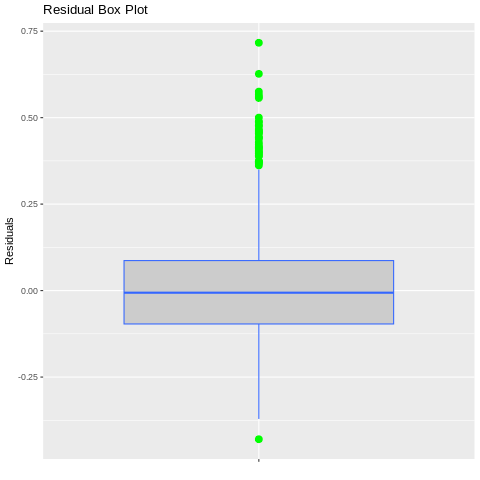

In [ ]:
%%R

# import all data
SDOH_data_df <- read_excel("June_MERGED_SDOH_PLUS_UTIL.xlsx")

# reduce df to just feature variables
SDOH_featuresonly_df <- SDOH_data_df %>%
                    select (-c(COUNTYFIPS, STATE, COUNTY, REGION, IS_METRO_MICRO))
str(SDOH_featuresonly_df$HOSP_FIPS_UTIL)
SDOH_featuresonly_df$HOSP_FIPS_UTIL <- as.numeric(SDOH_featuresonly_df$HOSP_FIPS_UTIL)
SDOH_featuresonly_df <- SDOH_featuresonly_df %>%
  filter(!is.na(HOSP_FIPS_UTIL), is.finite(HOSP_FIPS_UTIL))

# to see the correlation diagnostics
model <- lm(HOSP_FIPS_UTIL ~ ., data = SDOH_featuresonly_df)
write.csv(ols_vif_tol(model), file='output_43var_vif_tol.csv')
ols_eigen_cindex(model)
ols_plot_diagnostics(model)

# from here, used excel to combine the vif/tol data with abs correlation data

# returning to R to create a table visualization
# using formattable
tabledf <- data.frame(
  id = 1:41,
  FullSet = c("BED_UTIL_RATIO","IS_METRO_MICRO","ACS_PCT_RENTER_HU_avg",
              "POS_DIST_MEDSURG_ICU_TRACT_avg","ACS_PCT_RENTER_HU_COST_50PCT_avg"
              ,"ACS_PCT_RENTER_HU_COST_30PCT_avg","ACS_TOT_POP_POV_sum",
              "ACS_PCT_OWNER_HU_COST_30PCT_avg","CEN_POPDENSITY_TRACT_avg",
"CEN_AREALAND_SQM_TRACT_avg","ACS_MEDIAN_HH_INC_sum",
"ACS_PCT_HH_ALONE_ABOVE65_avg","ACS_PCT_AGE_ABOVE65_avg",
"ACS_PCT_HU_NO_VEH_avg","ACS_PCT_PUBL_TRANSIT_avg",
"ACS_PCT_CHILD_1FAM_avg","ACS_PCT_HH_INTERNET_avg",
"POS_DIST_ED_TRACT_avg","ACS_PCT_HU_MOBILE_HOME_avg",
"ACS_PCT_DISABLE_avg","ACS_PCT_POV_ASIAN_avg",
"ACS_PCT_HU_COAL_avg","POS_DIST_CLINIC_TRACT_avg",
"ACS_PCT_POV_HISPANIC_avg","POS_DIST_TRAUMA_TRACT_avg",
"ACS_PCT_POV_BLACK_avg","WUSTL_AVG_PM25_avg","ACS_PCT_COMMT_60MINUP_avg",
"ACS_PCT_ENGL_NOT_ALL_avg","ACS_PCT_POV_WHITE_avg","ACS_PCT_MEDICARE_ONLY_avg",
"ACS_AVG_HH_SIZE_avg","ACS_PCT_HH_INC_10000_avg","ACS_PCT_LT_HS_avg",
"ACS_PCT_PRIVATE_ANY_avg","ACS_PCT_HH_FOOD_STMP_avg",
"ACS_PCT_HH_FOOD_STMP_BLW_POV_avg","ACS_PCT_MEDICAID_ANY_avg",
"ACS_PCT_PUBLIC_ONLY_avg","ACS_PCT_UNINSURED_avg",
"ACS_PCT_UNINSURED_BELOW64_avg"),
Tolerance = c(0.000000,0.000000,0.263524,0.636786,0.320966,0.292087,0.636657,
0.483791,0.154896,0.586418,0.158180,0.274226,0.142813,0.227585,0.177858,0.360392,
0.146116,0.713086,0.370709,0.271089,0.890805,0.885632,0.853440,0.822499,
0.808000,0.804920,0.647928,0.576886,0.446519,0.309483,0.260368,0.225792,
0.224156,0.196487,0.085559,0.076078,0.066547,0.049709,0.032711,0.005027,
0.005017),
VIF=c(0.000000,0.000000,3.794726,1.570387,3.115592,3.423638,1.570704,2.067008,
6.455954,1.705269,6.321911,3.646632,7.002158,4.393966,5.622453,2.774760,
6.843869,1.402356,2.697537,3.688826,1.122581,1.129137,1.171728,1.215807,
1.237623,1.242360,1.543382,1.733444,2.239548,3.231191,3.840712,4.428856,
4.461174,5.089408,11.687852,13.144396,15.026943,20.117082,30.571047,
198.913453,199.303207),
Top20AbsCor=c(1.000000,0.404077,0.286736871,0.278767451,0.248769022,0.246322297,
0.243171383,0.231916075,0.224610719,0.221156742,0.197687439,0.195665618,
0.188541187,0.174349094,0.167791904,0.16129482,0.15493856,0.154278273,
0.146036258,0.138186389,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,
0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,
0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000),
Chosen=c(TRUE,TRUE,TRUE,TRUE,TRUE,TRUE,TRUE,TRUE,TRUE,TRUE,TRUE,TRUE,TRUE,TRUE,
TRUE,TRUE,TRUE,TRUE,TRUE,TRUE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,
FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,
FALSE,FALSE,FALSE,FALSE),
stringsAsFactors = FALSE)

formattable(tabledf, list(
  Tolerance = color_tile("gray", "lightgreen"),
  VIF = formatter("span",
    style = x ~ style(color = ifelse(x <= 7, "darkgreen", "gray")),
    x ~ sprintf("%.6f", x)),
  Top20AbsCor = formatter("span", style = x ~ ifelse(x > 0,
    style(color = "green", font.weight = "bold"), NA)),
  Chosen = formatter("span",
    style = x ~ style(color = ifelse(x, "green", "red")),
    x ~ icontext(ifelse(x, "ok", "remove"), ifelse(x, "Yes", "No")))
))
# image needed to be pieced together with Paint because I couldn't
# get the export to work properly


## Visualization

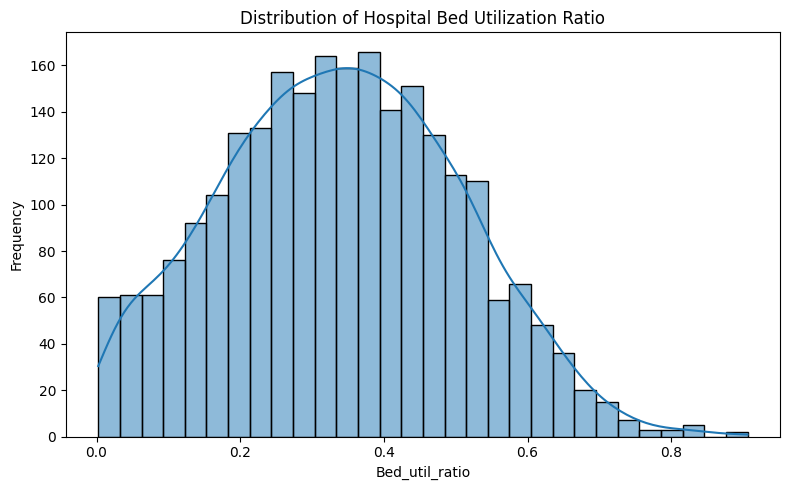

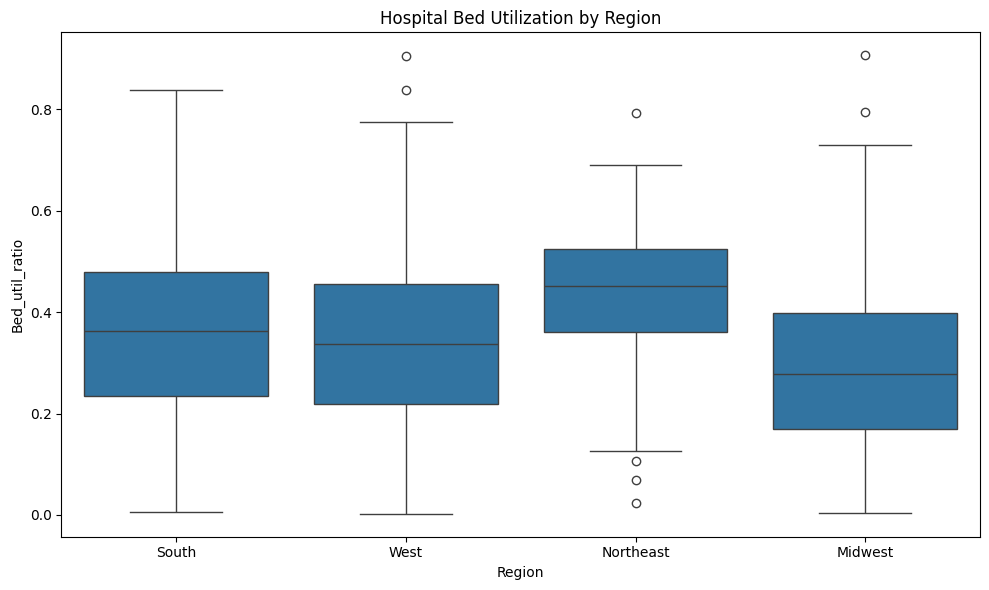

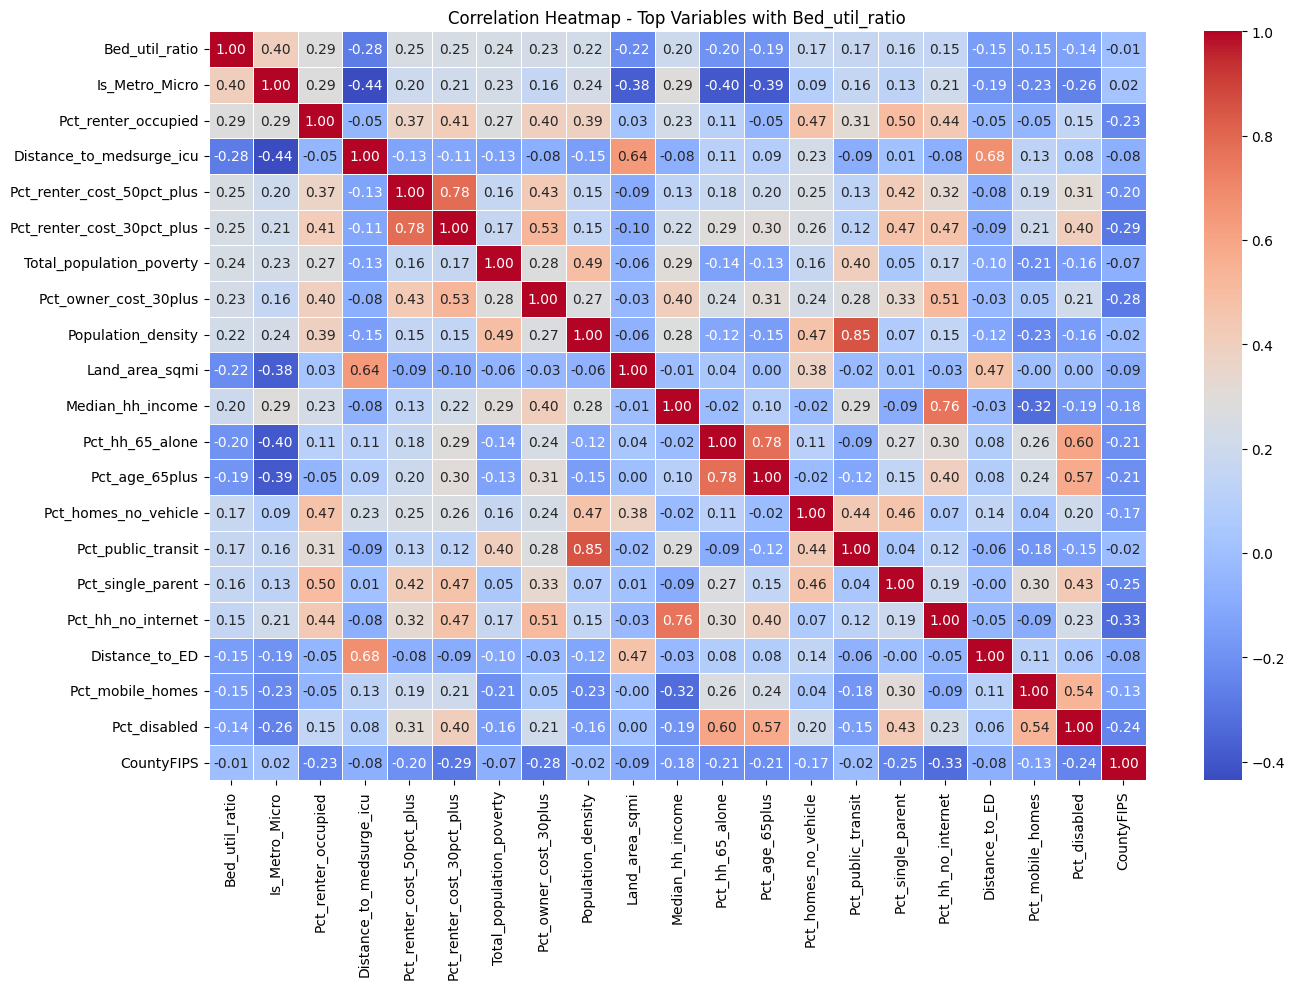

In [ ]:
# Histogram of Bed_util_ratio
plt.figure(figsize=(8, 5))
sns.histplot(df_selected['Bed_util_ratio'], kde=True, bins=30)
plt.title("Distribution of Hospital Bed Utilization Ratio")
plt.xlabel("Bed_util_ratio")
plt.ylabel("Frequency")
plt.tight_layout()
plt.show()
# ---------

# Boxplot by Region
plt.figure(figsize=(10, 6))
sns.boxplot(data=df_selected, x="Region", y="Bed_util_ratio")
plt.title("Hospital Bed Utilization by Region")
plt.xlabel("Region")
plt.ylabel("Bed_util_ratio")
plt.tight_layout()
plt.show()
# ---------

# Correlation Matrix Table
corr_matrix = df_selected.corr(numeric_only=True)
top_corr_vars = corr_matrix['Bed_util_ratio'].abs().sort_values(ascending=False).index
# ---------

# Heatmap
plt.figure(figsize=(14, 10))
sns.heatmap(df_selected[top_corr_vars].corr(), annot=True, cmap="coolwarm", fmt=".2f",linewidths=0.5,
    annot_kws={"size": 10})
plt.title("Correlation Heatmap - Top Variables with Bed_util_ratio")
plt.tight_layout()
plt.show()

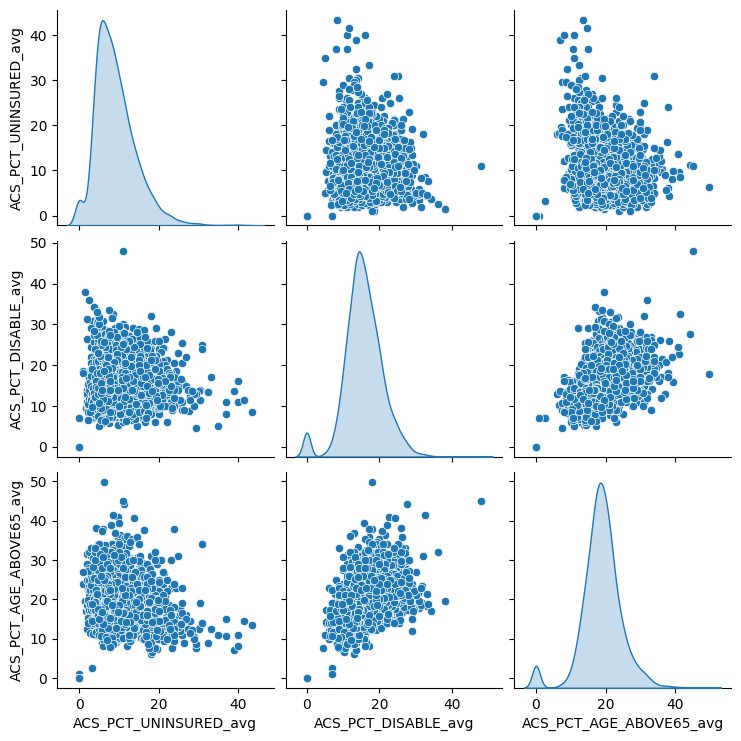

In [ ]:
df = pd.read_excel("June_MERGED_SDOH_PLUS_UTIL.xlsx")

# Pairplot
sns.pairplot(df[['ACS_PCT_UNINSURED_avg', 'ACS_PCT_DISABLE_avg', 'ACS_PCT_AGE_ABOVE65_avg']], diag_kind="kde")

# Save plot
# plt.savefig("pairplot.png", bbox_inches='tight', dpi=300)

plt.show()

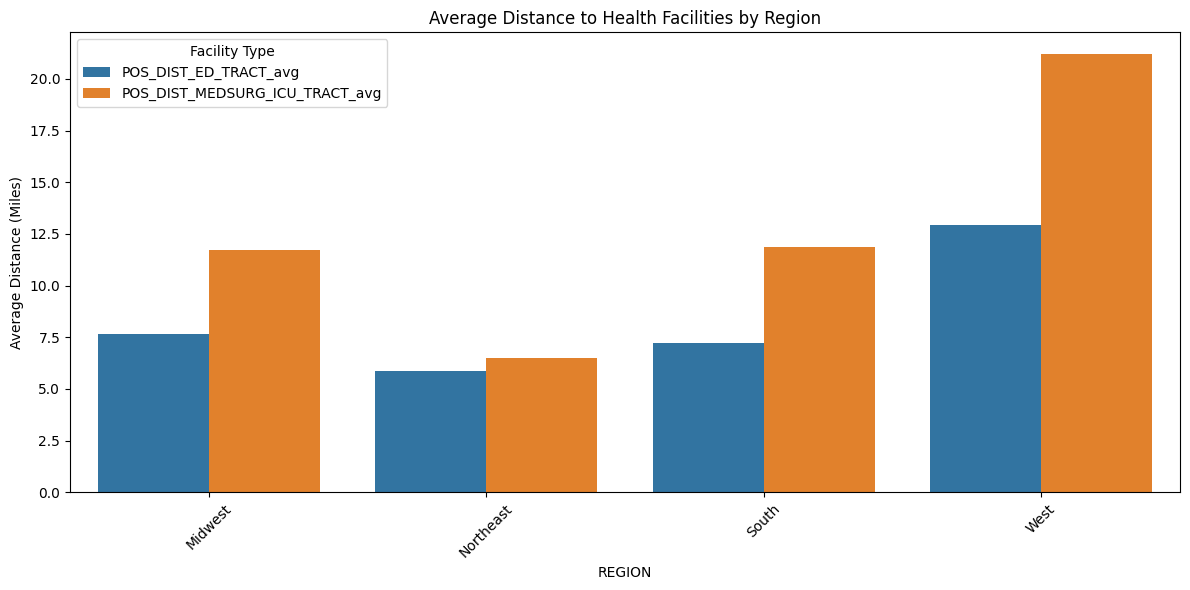

In [ ]:
# Bar chart
dist_by_region = df.groupby('REGION')[[
    'POS_DIST_ED_TRACT_avg',
    'POS_DIST_MEDSURG_ICU_TRACT_avg'
]].mean().reset_index()

# Melt for multi-bar plot
df_melt = dist_by_region.melt(id_vars='REGION', var_name='Facility Type', value_name='Avg Distance')

plt.figure(figsize=(12, 6))
sns.barplot(data=df_melt, x='REGION', y='Avg Distance', hue='Facility Type')
plt.title('Average Distance to Health Facilities by Region')
plt.ylabel("Average Distance (Miles)")
plt.xticks(rotation=45)
plt.tight_layout()

# Save plot
# plt.savefig("avg_distance.png", bbox_inches='tight', dpi=300)

plt.show()

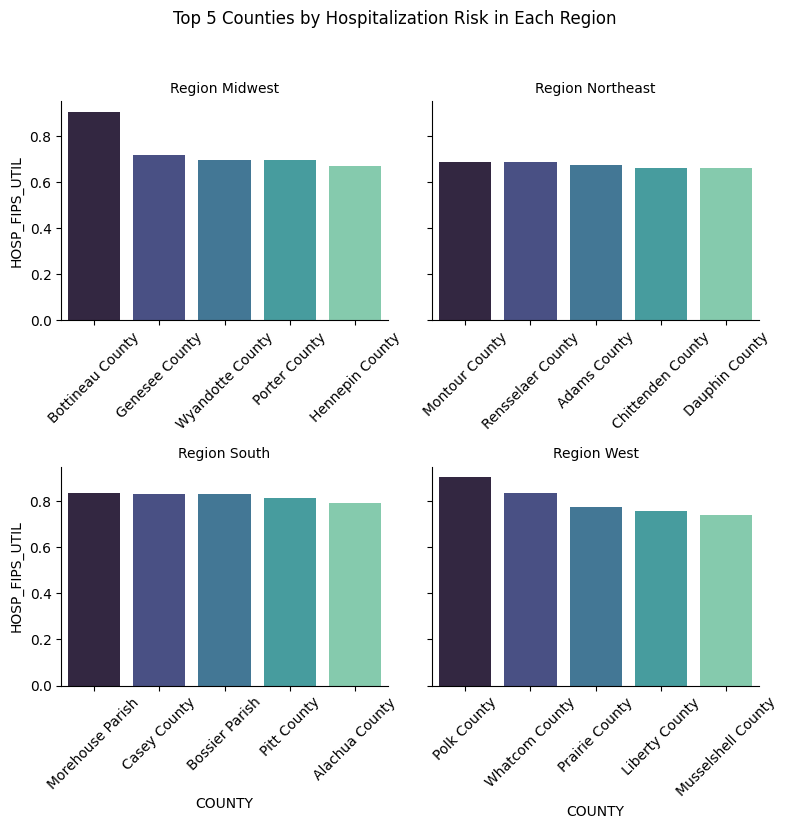

In [ ]:
# Multi bar chart
# Group by Region and County
risk_by_region_county = df.groupby(['REGION', 'COUNTY'])['HOSP_FIPS_UTIL'].mean().reset_index()

# limit to top N counties per region
top_county = (
    risk_by_region_county
    .sort_values(['REGION', 'HOSP_FIPS_UTIL'], ascending=[True, False])
    .groupby('REGION')
    .head(5)  # top 5 per region
)

g = sns.FacetGrid(top_county, col='REGION', col_wrap=2, height=4, sharex=False)
g.map_dataframe(
    sns.barplot,
    x='COUNTY',
    y='HOSP_FIPS_UTIL',
    hue='COUNTY',
    palette='mako',
    legend=False
)
g.set_xticklabels(rotation=45)
g.set_titles("Region {col_name}")
g.fig.suptitle("Top 5 Counties by Hospitalization Risk in Each Region", y=1.03)
plt.tight_layout()

# Save the plot
#plt.savefig("util_risk_region_county.png", bbox_inches='tight', dpi=300)

plt.show()

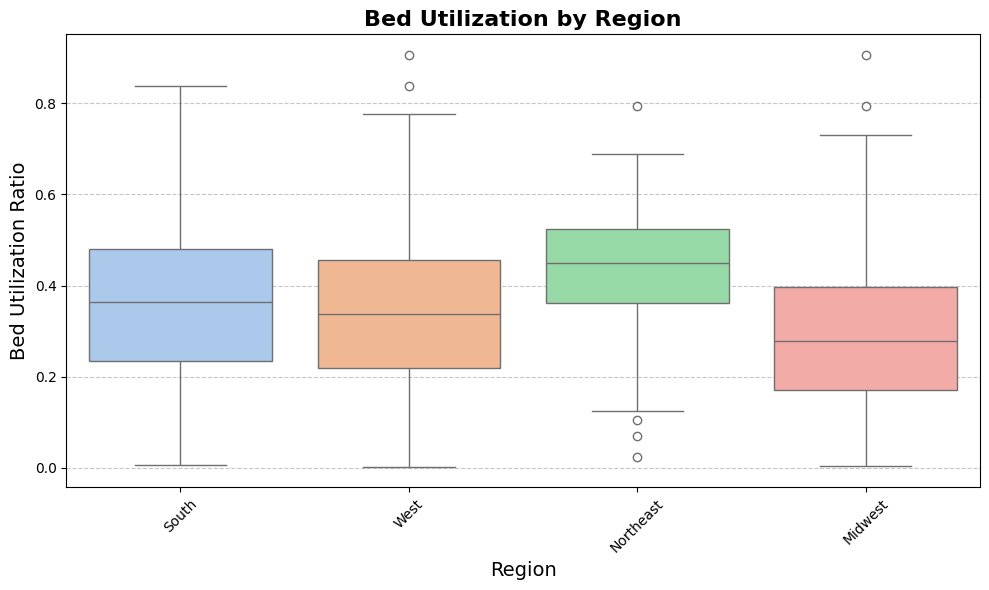

In [ ]:
##################boxplot by region###################################################

#set x andy axis
plt.figure(figsize=(10, 6))
sns.boxplot(x="REGION", y="HOSP_FIPS_UTIL", data=df, palette="pastel")
#update formating
plt.title("Bed Utilization by Region", fontsize=16, weight='bold')
plt.xlabel("Region", fontsize=14)
plt.ylabel("Bed Utilization Ratio", fontsize=14)
plt.xticks(rotation=45)
plt.grid(True, axis='y', linestyle='--', alpha=0.7)

#show visual
plt.tight_layout()
plt.show()

In [ ]:
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.io as pio
import seaborn as sns
pio.renderers.default = 'colab'


##################################choropleth map##########################################


# Ensure FIPS code is string and properly formatted
df["COUNTYFIPS"] = df["COUNTYFIPS"].astype(str).str.zfill(5)

# Drop rows where utilization is missing
df_clean = df[df["HOSP_FIPS_UTIL"].notna()]

# Custom yellow to red scale (0 = yellow, 1 = red)
custom_colorscale = [
    [0.0, "yellow"],
    [1.0, "red"]
]

fig = px.choropleth(
    df_clean,
    geojson="https://raw.githubusercontent.com/plotly/datasets/master/geojson-counties-fips.json",
    locations="COUNTYFIPS",
    color="HOSP_FIPS_UTIL",
    color_continuous_scale=custom_colorscale,
    scope="usa",
    labels={'HOSP_FIPS_UTIL': 'Hospital Utilization'}
)

# Fit and clean up the map
fig.update_geos(fitbounds="locations", visible=False)

#customize and add title
fig.update_layout(
    title={
        'text': "Hospital Utilization by County",
        'y': 0.95,
        'x': 0.5,
        'xanchor': 'center',
        'yanchor': 'top',
        'font': {'size': 24}
    }
)

#open plot in browser
#pio.renderers.default = 'browser'
#fig.show()
fig.show(renderer='colab')

# Preprocessing, Encoding, Imputation

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.impute import KNNImputer
import matplotlib.pyplot as plt

# reloading
df = pd.read_csv('/content/MERGED_SDOH_PLUS_UTIL_24_RenamedColumns.csv')

# Train-test split calculator
## Written by Katherine S. Geist, PhD
## Merrimack College, Massachusetts
## https://github.com/ksgeist

def calcSplitRatio(df, p=None):
    if p is None:
        p = df.shape[1] - 1
    test_N = (1 / np.sqrt(p)) * len(df)
    test_prop = round(test_N / len(df), 2)
    train_prop = 1 - test_prop
    print(f"\nCalculated train/test split: {train_prop:.2f}/{test_prop:.2f}")
    return train_prop

# --- 1. Load and Initial Cleaning ---
df_cleaned = df.dropna(subset=["Region"])
df_cleaned = df_cleaned[df_cleaned["State"] != "District of Columbia"]

# Drop unnecessary columns
df_cleaned = df_cleaned.drop(columns=["State", "Land_area_sqmi", "Pct_renter_cost_30pct_plus"], errors="ignore")

# Drop rows with missing predictor values (except for Is_Metro_Micro and Bed_util_ratio)
predictor_cols = [col for col in df_cleaned.columns if col not in ["Bed_util_ratio", "Is_Metro_Micro"]]
df_cleaned = df_cleaned.dropna(subset=predictor_cols)

# --- 2. Split modeling vs missing target ---
df_modeling = df_cleaned[df_cleaned["Bed_util_ratio"].notnull()].copy()
df_missing_target = df_cleaned[df_cleaned["Bed_util_ratio"].isnull()].copy()

print(f"Modeling dataset shape (non-missing target): {df_modeling.shape}")
print(f"Rows with missing Bed_util_ratio preserved separately: {df_missing_target.shape}")

# --- 3. Train-Test Split ---
X = df_modeling.drop(columns=["Bed_util_ratio"])
y = df_modeling["Bed_util_ratio"]

split_ratio = calcSplitRatio(df_modeling)
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=split_ratio, random_state=42)

# --- 4. Encoding ---
for subset in [X_train, X_test]:
    subset["Is_Metro_Micro"] = subset["Is_Metro_Micro"].map({True: 1, False: 0, np.nan: np.nan})

# One-hot encode Region
X_train = pd.get_dummies(X_train, columns=["Region"], prefix="Region", drop_first=True)
X_test = pd.get_dummies(X_test, columns=["Region"], prefix="Region", drop_first=True)

# Align columns between train and test
X_train, X_test = X_train.align(X_test, join='left', axis=1, fill_value=0)

# Drop unused columns
X_train = X_train.drop(columns=["CountyFIPS", "County"], errors="ignore")
X_test = X_test.drop(columns=["CountyFIPS", "County"], errors="ignore")

# --- 5. Scaling and Imputation ---
scaler = StandardScaler()
X_train_scaled = pd.DataFrame(scaler.fit_transform(X_train), columns=X_train.columns, index=X_train.index)
X_test_scaled = pd.DataFrame(scaler.transform(X_test), columns=X_test.columns, index=X_test.index)

knn = KNNImputer(n_neighbors=5)
X_train_scaled["Is_Metro_Micro"] = knn.fit_transform(X_train_scaled[["Is_Metro_Micro"]])
X_test_scaled["Is_Metro_Micro"] = knn.transform(X_test_scaled[["Is_Metro_Micro"]])

# --- 6. Reattach Targets ---
train_final = X_train_scaled.copy()
train_final["Bed_util_ratio"] = y_train
test_final = X_test_scaled.copy()
test_final["Bed_util_ratio"] = y_test

df_model_imputed = pd.concat([train_final, test_final]).sort_index()
df_model_imputed["Is_Metro_Micro"] = (df_model_imputed["Is_Metro_Micro"] >= 0.5).astype(int)

print("\nModeling dataset ready with imputed Is_Metro_Micro and non-imputed Bed_util_ratio.")
print(df_model_imputed.head())

# --- 7. Handle missing-target dataset ---
df_missing_target_encoded = df_missing_target.copy()

df_missing_target_encoded["Is_Metro_Micro"] = df_missing_target_encoded["Is_Metro_Micro"].map({True: 1, False: 0, np.nan: np.nan})
df_missing_target_encoded = pd.get_dummies(df_missing_target_encoded, columns=["Region"], prefix="Region", drop_first=True)

df_missing_target_encoded = df_missing_target_encoded.reindex(columns=X_train.columns.union(["state_encoded", "Is_Metro_Micro"]), fill_value=0)

df_missing_scaled = df_missing_target_encoded.copy()
df_missing_scaled = df_missing_scaled[X_train.columns]
df_missing_scaled = pd.DataFrame(scaler.transform(df_missing_scaled), columns=X_train.columns, index=df_missing_scaled.index)

df_missing_scaled["Is_Metro_Micro"] = knn.transform(df_missing_scaled[["Is_Metro_Micro"]])
df_missing_scaled["Is_Metro_Micro"] = (df_missing_scaled["Is_Metro_Micro"] >= 0.5).astype(int)

# Add placeholder Bed_util_ratio = NaN
df_missing_scaled["Bed_util_ratio"] = np.nan

# --- 8. Combine Full Dataset ---
df_final_full = pd.concat([df_model_imputed, df_missing_scaled], axis=0).sort_index()
print(f"\nFull dataset shape after re-integration: {df_final_full.shape}")
print(df_final_full.head())

# --- 9. Export ---
df_final_full.to_excel("final_full_dataset_with_preserved_missing_targets.xlsx", index=False)
print("\nExported full dataset with missing targets preserved.")

df_model_imputed.to_excel("modeling_dataset_only.xlsx", index=False)
print("Exported: modeling_dataset_only.xlsx")


Modeling dataset shape (non-missing target): (2391, 21)
Rows with missing Bed_util_ratio preserved separately: (751, 21)

Calculated train/test split: 0.78/0.22

Modeling dataset ready with imputed Is_Metro_Micro and non-imputed Bed_util_ratio.
   Pct_renter_occupied  Distance_to_medsurge_icu  Pct_renter_cost_50pct_plus  \
0            -0.425206                 -0.471017                    1.383843   
1            -0.699455                 -0.248219                    0.014196   
2             1.178700                 -0.127155                    0.188555   
3            -0.479857                  1.178608                    1.290080   
4            -0.534053                 -0.014738                    0.638884   

   Total_population_poverty  Pct_owner_cost_30plus  Population_density  \
0                 -0.184447               0.243717           -0.032985   
1                  0.265340               0.379438           -0.254184   
2                 -0.277534              -0.447575  

In [ ]:
print([col for col in df_cleaned.columns if "Land" in col])


[]


In [ ]:
X_train_scaled.isnull().sum()

,0
Pct_renter_occupied,0
Distance_to_medsurge_icu,0
Pct_renter_cost_50pct_plus,0
Total_population_poverty,0
Pct_owner_cost_30plus,0
Population_density,0
Median_hh_income,0
Pct_hh_65_alone,0
Pct_age_65plus,0
Pct_homes_no_vehicle,0


In [ ]:
X_test_scaled.isnull().sum()

,0
Pct_renter_occupied,0
Distance_to_medsurge_icu,0
Pct_renter_cost_50pct_plus,0
Total_population_poverty,0
Pct_owner_cost_30plus,0
Population_density,0
Median_hh_income,0
Pct_hh_65_alone,0
Pct_age_65plus,0
Pct_homes_no_vehicle,0


In [ ]:
len(X_train_scaled), len(X_test_scaled)

(1864, 527)

## Evaluation

### Histogram of Bed_util_ratio - Train vs Test (No Imputation)

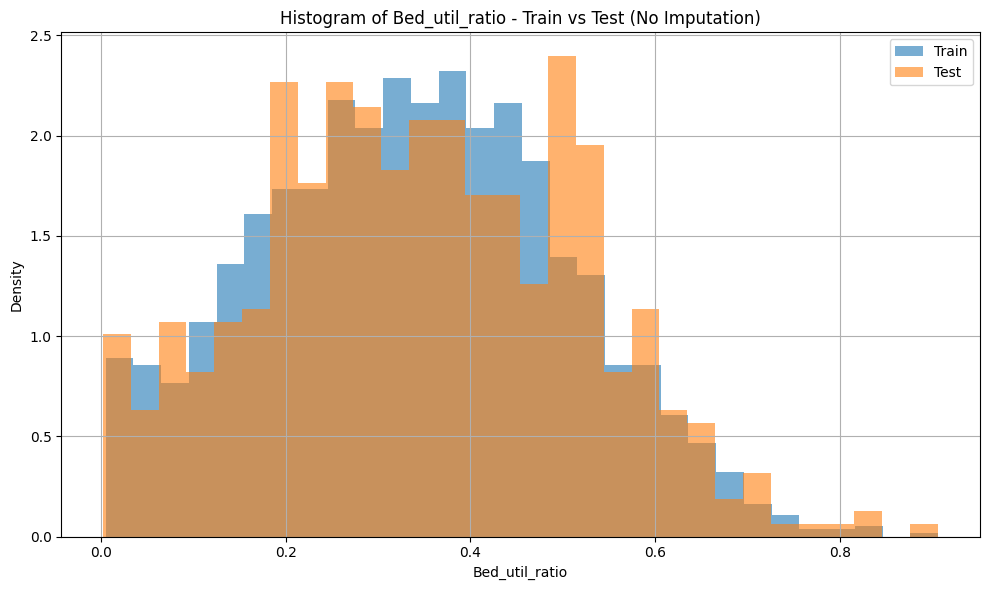

In [ ]:
# === Histogram of Bed_util_ratio - Train vs Test (No Imputation) ===
plt.figure(figsize=(10, 6))
plt.hist(train_final["Bed_util_ratio"], bins=30, alpha=0.6, label="Train", density=True)
plt.hist(test_final["Bed_util_ratio"], bins=30, alpha=0.6, label="Test", density=True)
plt.title("Histogram of Bed_util_ratio - Train vs Test (No Imputation)")
plt.xlabel("Bed_util_ratio")
plt.ylabel("Density")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


### BarPlot - Imputation Comparison for Is_Metro_Micro

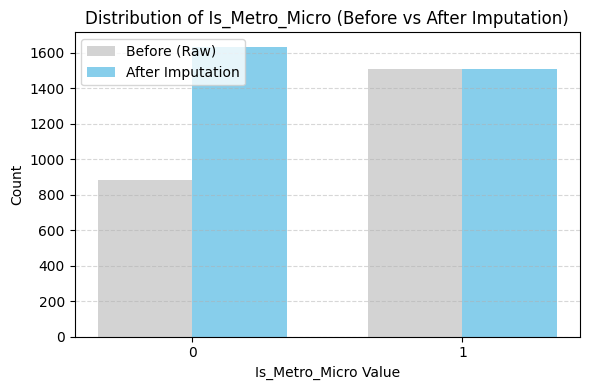

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Before imputation: include NaNs
before = df_cleaned["Is_Metro_Micro"].map({True: 1, False: 0, np.nan: np.nan}).value_counts(dropna=False)
before.index = before.index.astype("object")  # so NaN label is retained

# After imputation: should be only 0 and 1
after = df_final_full["Is_Metro_Micro"].value_counts()

# Align both to 0 and 1 only (for bar chart)
x_labels = [0, 1]
before_aligned = [before.get(0, 0), before.get(1, 0)]
after_aligned = [after.get(0, 0), after.get(1, 0)]

# Plot
bar_width = 0.35
x = np.arange(len(x_labels))

plt.figure(figsize=(6, 4))
plt.bar(x - bar_width/2, before_aligned, width=bar_width, label="Before (Raw)", color="lightgray")
plt.bar(x + bar_width/2, after_aligned, width=bar_width, label="After Imputation", color="skyblue")

plt.xticks(ticks=x, labels=["0", "1"])
plt.xlabel("Is_Metro_Micro Value")
plt.ylabel("Count")
plt.title("Distribution of Is_Metro_Micro (Before vs After Imputation)")
plt.legend()
plt.grid(True, axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


### Shapiro-Wilk W Statistic for Bed_util_ratio

In [ ]:
from scipy.stats import shapiro

# Run only on non-null values
target_values = df_final_full["Bed_util_ratio"].dropna()

# Perform Shapiro-Wilk test
stat, p = shapiro(target_values)

print("Shapiro-Wilk W Statistic:", stat)
print("p-value:", p)

if p > 0.05:
    print("Target appears normally distributed (fail to reject H0)")
else:
    print("Target likely not normally distributed (reject H0)")


Shapiro-Wilk W Statistic: 0.9919237932068726
p-value: 2.821064526072581e-10
Target likely not normally distributed (reject H0)


In [ ]:
Shapiro_Result = """We conducted a Shapiro-Wilk test on Bed_util_ratio to assess normality. \nThe resulting W statistic was 0.992 with a p-value < 0.001, indicating the distribution is not normal. \nThis insight may inform downstream modeling choices (e.g., transformation before regularized regression). \nSince our primary modeling approach includes methods that do not assume normality (e.g., tree-based or clustering models), \nwe retained the raw distribution of the target for now."""
print(Shapiro_Result)

We conducted a Shapiro-Wilk test on Bed_util_ratio to assess normality. 
The resulting W statistic was 0.992 with a p-value < 0.001, indicating the distribution is not normal. 
This insight may inform downstream modeling choices (e.g., transformation before regularized regression). 
Since our primary modeling approach includes methods that do not assume normality (e.g., tree-based or clustering models), 
we retained the raw distribution of the target for now.


### Distribution of Bed_Util_Ratio w/ KDE

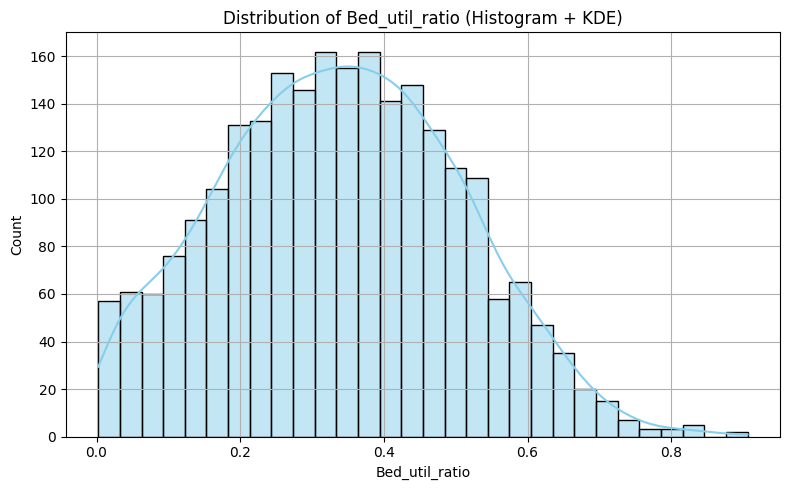

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Drop missing target values
bed_util_values = df_final_full["Bed_util_ratio"].dropna()

# Plot histogram
plt.figure(figsize=(8, 5))
sns.histplot(bed_util_values, kde=True, bins=30, color="skyblue")
plt.title("Distribution of Bed_util_ratio (Histogram + KDE)")
plt.xlabel("Bed_util_ratio")
plt.ylabel("Count")
plt.grid(True)
plt.tight_layout()
plt.show()


### Q-Q Plot for Normality Check

<Figure size 600x600 with 0 Axes>

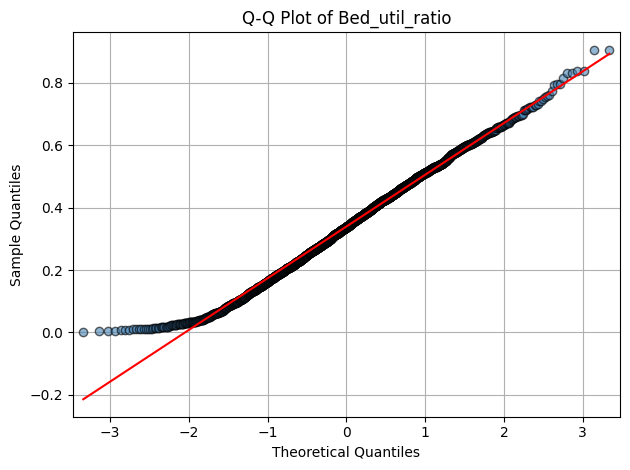

In [ ]:
import statsmodels.api as sm
import scipy.stats as stats

# Drop missing target values
bed_util_values = df_final_full["Bed_util_ratio"].dropna()

# QQ plot
plt.figure(figsize=(6, 6))
sm.qqplot(bed_util_values, line="s", markerfacecolor='steelblue', markeredgecolor='black', alpha=0.6)
plt.title("Q-Q Plot of Bed_util_ratio")
plt.grid(True)
plt.tight_layout()
plt.show()


# Exploratory Analysis and Clustering

In [ ]:
"""
PCA Exploration and Unsupervised Learning Analysis

This section performs in-depth exploratory analysis using the PCA-transformed data
and implements unsupervised learning techniques to identify patterns in hospital
bed utilization across geographic regions.

Component Interpretation:
- Analyzes top contributing features for each principal component
- PC1: Dominated by urban characteristics (population density, income)
- PC2: Represents social vulnerability factors (single parents, transportation access)
- PC3: Indicates aging population metrics
- Additional components capture regional and healthcare access features

Visualization and Loading Analysis:
- Creates PCA biplots with feature loadings
- Uses letter labels (A-T) for features to enhance readability
- Generates loading vectors showing feature influence on components
- Color-codes points by Bed_util_ratio for relationship exploration

K-Means Clustering:
- Implements elbow method to determine optimal cluster count
- Performs K-means clustering on first two principal components
- Calculates silhouette score to evaluate cluster quality
- Results indicate moderate cluster structure

Cluster Characterization:
- Identifies three distinct clusters based on feature patterns
- Each cluster represents different utilization profiles
- Analyzes geographic, demographic, and access characteristics

Geographic Visualization:
- Creates county-level choropleth maps using Plotly
- Maps cluster assignments to FIPS codes
- Shows spatial distribution of clusters across the United States
- Uses distinct color scheme for clear cluster differentiation

Cluster Statistics:
- Computes cluster means for all standardized features
- Identifies distinguishing characteristics of each cluster
- Exports cluster profiles for further interpretation
- Reveals underlying patterns in healthcare utilization

Key Findings:
- Three distinct healthcare utilization patterns emerge
- Urban-rural divide strongly influences bed utilization
- Socioeconomic factors correlate with healthcare access
- Regional variations show clear geographic patterns
"""


'\nPCA Exploration and Unsupervised Learning Analysis\n\nThis section performs in-depth exploratory analysis using the PCA-transformed data\nand implements unsupervised learning techniques to identify patterns in hospital\nbed utilization across geographic regions.\n\nComponent Interpretation:\n- Analyzes top contributing features for each principal component\n- PC1: Dominated by urban characteristics (population density, income)\n- PC2: Represents social vulnerability factors (single parents, transportation access)\n- PC3: Indicates aging population metrics\n- Additional components capture regional and healthcare access features\n\nVisualization and Loading Analysis:\n- Creates PCA biplots with feature loadings\n- Uses letter labels (A-T) for features to enhance readability\n- Generates loading vectors showing feature influence on components\n- Color-codes points by Bed_util_ratio for relationship exploration\n\nK-Means Clustering:\n- Implements elbow method to determine optimal clust

# PCA

## PCA Setup with Box-Cox Transformation

Box-Cox Lambda: 0.7989


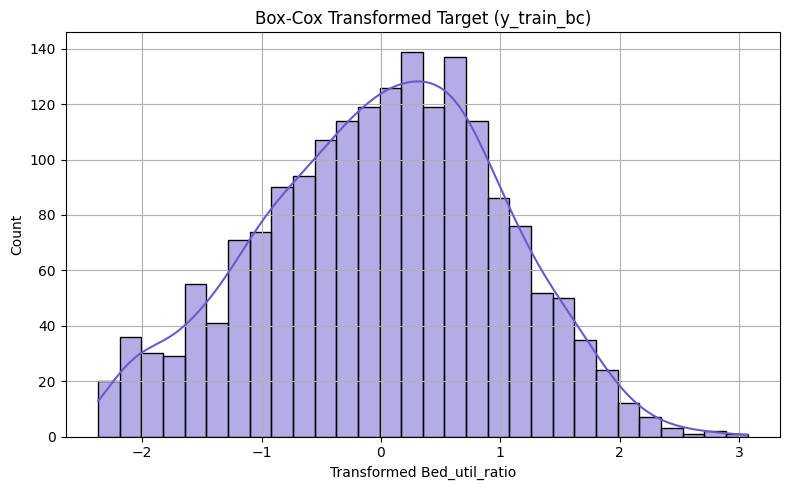

Shapiro-Wilk Test for Normality of Transformed Target:
W = 0.9930, p = 0.0000
Transformed target likely not normal.


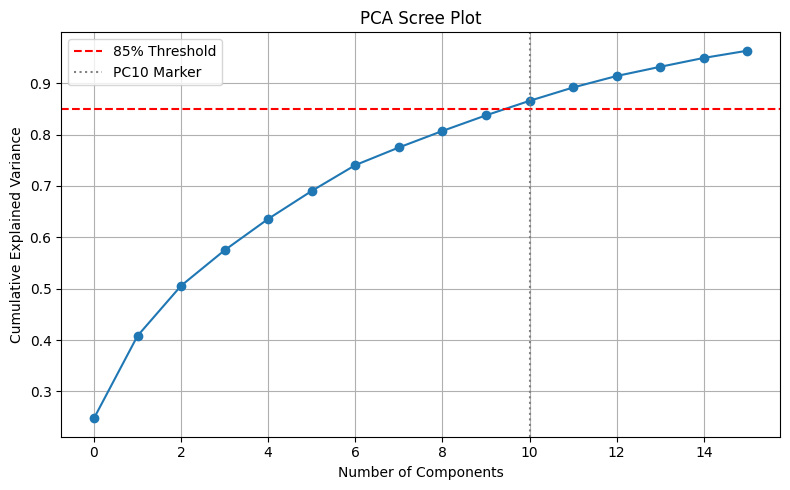

,Component,Explained Variance Ratio,Cumulative Variance
0,PC1,0.247705,0.247705
1,PC2,0.160430,0.408134
2,PC3,0.097567,0.505701
3,PC4,0.069142,0.574843
4,PC5,0.060934,0.635777
5,PC6,0.054443,0.690219
6,PC7,0.050238,0.740458
7,PC8,0.034305,0.774763
8,PC9,0.032176,0.806939
9,PC10,0.030380,0.837318


Original shape (X_train_scaled): (1864, 20)
Reduced shape after PCA (train): (1864, 16)
Reduced shape after PCA (test): (527, 16)


In [ ]:
"""
This cell continues from the preprocessing pipeline and assumes the following
variables are already defined:
- X_train_scaled, X_test_scaled: scaled feature sets (with no missing values)
- y_train, y_test: untransformed target values (may include small or non-positive values)

This step performs:
- Box-Cox transformation on the target (Bed_util_ratio) to correct skewness and approximate normality
    - Applies safe shifting for Box-Cox if any values are ≤ 0
    - Includes diagnostic checks: histogram and Shapiro-Wilk test
- Principal Component Analysis (PCA) on the scaled features to reduce dimensionality
    - Retains enough components to explain ≥95% of variance
    - Visualizes cumulative explained variance via a scree plot

Final outputs:
- Transformed target: y_train_bc, y_test_bc
- Reduced feature sets: X_train_pca, X_test_pca
- Diagnostic outputs for lambda, distribution, normality, and variance retention
"""


# --- Box-Cox Transformation + PCA Setup ---

from sklearn.decomposition import PCA
from sklearn.preprocessing import PowerTransformer
from scipy.special import inv_boxcox
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

# Shift the target if needed (Box-Cox requires strictly positive values)
if (y_train <= 0).any():
    shift_amount = abs(y_train.min()) + 0.01
    y_train_shifted = y_train + shift_amount
    y_test_shifted = y_test + shift_amount
else:
    shift_amount = 0
    y_train_shifted = y_train
    y_test_shifted = y_test

# Apply Box-Cox
pt = PowerTransformer(method='box-cox')
y_train_bc = pt.fit_transform(y_train_shifted.values.reshape(-1, 1)).flatten()
y_test_bc = pt.transform(y_test_shifted.values.reshape(-1, 1)).flatten()
lambda_bc = pt.lambdas_[0]

# ----------------------
# Box-Cox Diagnostic Output

print(f"Box-Cox Lambda: {lambda_bc:.4f}")

# Histogram of Box-Cox Transformed Target
plt.figure(figsize=(8, 5))
sns.histplot(y_train_bc, bins=30, kde=True, color='slateblue')
plt.title("Box-Cox Transformed Target (y_train_bc)")
plt.xlabel("Transformed Bed_util_ratio")
plt.grid(True)
plt.tight_layout()
plt.show()

# Shapiro-Wilk Normality Test
from scipy.stats import shapiro

stat_bc, p_bc = shapiro(y_train_bc)
print(f"Shapiro-Wilk Test for Normality of Transformed Target:")
print(f"W = {stat_bc:.4f}, p = {p_bc:.4f}")
if p_bc > 0.05:
    print("Transformed target appears approximately normal.")
else:
    print("Transformed target likely not normal.")

# ----------------------
# ------------PCA----------------

# PCA on scaled features
pca = PCA(n_components=0.95)
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

# Scree Plot
plt.figure(figsize=(8, 5))
plt.plot(np.cumsum(pca.explained_variance_ratio_), marker='o')

plt.axhline(y=0.85, color='r', linestyle='--', label='85% Threshold')
plt.axvline(x=10, color='grey', linestyle='dotted', label='PC10 Marker')

plt.xlabel("Number of Components")
plt.ylabel("Cumulative Explained Variance")
plt.title("PCA Scree Plot")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# View explained variance (optional)
explained_variance = pd.DataFrame({
    "Component": [f"PC{i+1}" for i in range(len(pca.explained_variance_ratio_))],
    "Explained Variance Ratio": pca.explained_variance_ratio_,
    "Cumulative Variance": np.cumsum(pca.explained_variance_ratio_)
})
display(explained_variance.head(10))

# --- Final Output ---
# Inspect original shape ---
print("Original shape (X_train_scaled):", X_train_scaled.shape)
print("Reduced shape after PCA (train):", X_train_pca.shape)
print("Reduced shape after PCA (test):", X_test_pca.shape)



## PCA Plots with Loadings

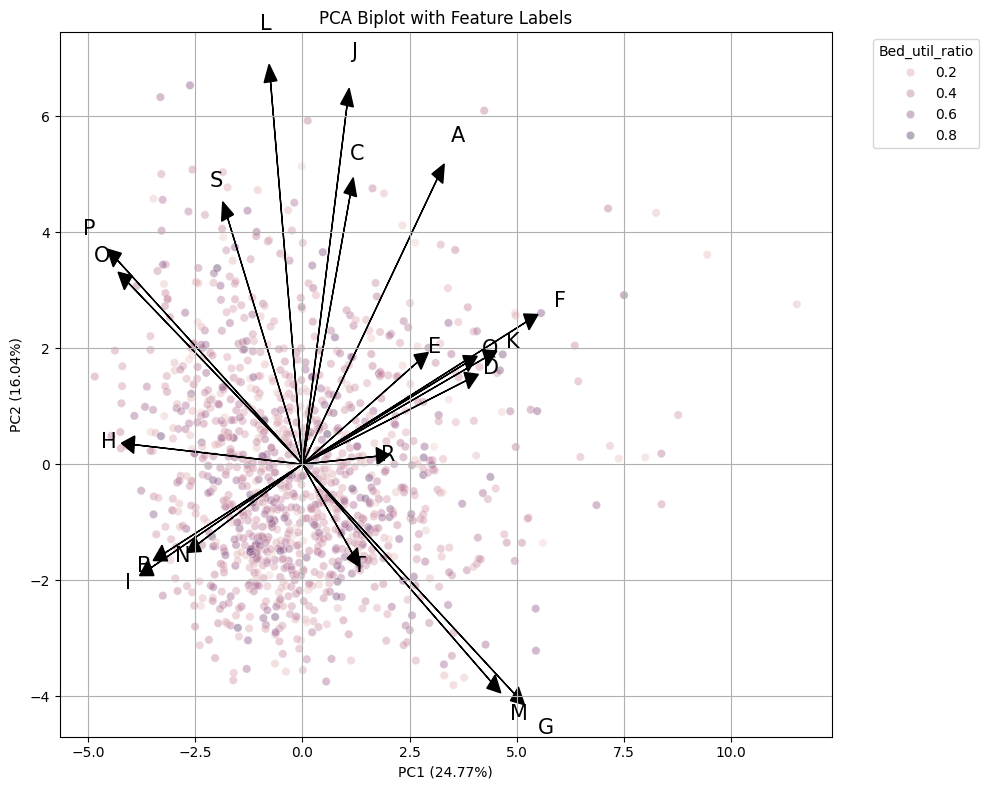

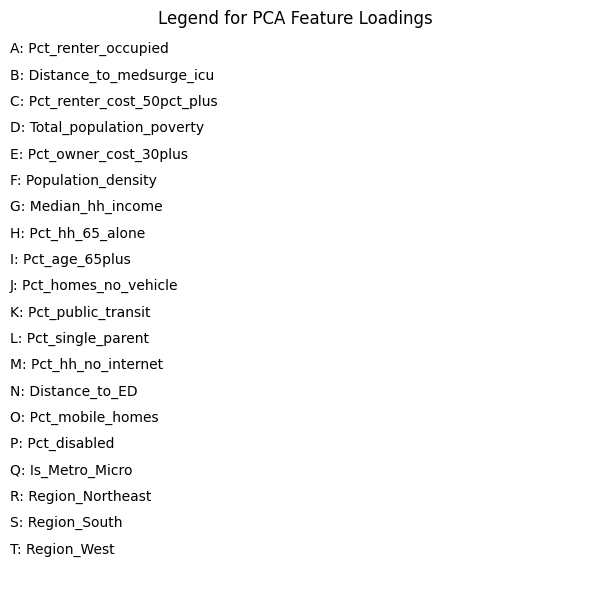

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
import string


#our variables
feature_names = X_train_scaled.columns.tolist()

# Create PCA DataFrame for plotting using df_final_full
pca_df = pd.DataFrame(X_train_pca[:, :2], columns=["PC1", "PC2"])

# Loadings for the first two components
loadings = pd.DataFrame(
    pca.components_[:2].T,
    columns=["PC1", "PC2"],
    index=X_train_scaled.columns
)

# Generate label map based on PCA loadings (actual features used)
feature_names = loadings.index.tolist()
feature_labels = list(string.ascii_uppercase[:len(feature_names)])
label_map = dict(zip(feature_names, feature_labels))



# Define the loading_plot function
def loading_plot(coeff, labels, scale=6, colors=None, visible=None, ax=plt, arrow_size=0.05, font_size=12):
  for i, label in enumerate(labels):
      if visible is None or visible[i]:
          ax.arrow(0, 0,
                    coeff[i, 0] * scale,
                    coeff[i, 1] * scale,
                    head_width=arrow_size * scale,
                    head_length=arrow_size * scale,
                    color="#000" if colors is None else colors[i])
          ax.text(coeff[i, 0] * 1.15 * scale,
                  coeff[i, 1] * 1.15 * scale,
                  label_map.get(label, label),  # Safe fallback
                  color="#000" if colors is None else colors[i],
                  ha="center", va="center", fontsize=font_size)




# Plot PCA biplot with feature loadings
plt.figure(figsize=(10, 8))
sns.scatterplot(x="PC1", y="PC2", data=pca_df, hue=df_final_full.loc[X_train_scaled.index, "Bed_util_ratio"], alpha=0.4)
loading_plot(loadings.values, labels=loadings.index, scale=15, arrow_size=0.02, font_size=15)


# Add axis labels and title
plt.xlabel(f"PC1 ({pca.explained_variance_ratio_[0]*100:.2f}%)")
plt.ylabel(f"PC2 ({pca.explained_variance_ratio_[1]*100:.2f}%)")
plt.title("PCA Biplot with Feature Labels")

# Add a legend in the top right corner for Bed_util_ratio
plt.legend(loc='upper right', bbox_to_anchor=(1.2, 1), title='Bed_util_ratio')

# Show grid and finalize plot layout
plt.grid(True)
plt.tight_layout()
plt.show()

# Create legend
legend_labels = [f"{label_map.get(name, name)}: {name}" for name in feature_names]


plt.figure(figsize=(6, len(legend_labels) * 0.3))
plt.axis('off')
for i, txt in enumerate(legend_labels):
    plt.text(0, 1 - i * 0.05, txt, fontsize=10)
plt.title("Legend for PCA Feature Loadings\n", fontsize=12)
plt.tight_layout()

plt.show()

## View - Top Predicters for PC1 only

In [ ]:
"""
This cell analyzes the contribution of original features to the first 10 principal components generated by PCA.

Purpose:
- To interpret what the principal components represent in terms of the original features
- To identify which features most strongly influence each component, especially PC1

Steps performed:
- Converts the PCA-transformed NumPy array (X_train_scaled) into a labeled DataFrame using the original feature names
- Constructs a PCA loadings matrix ('loadings_df'), where:
    - Rows = Principal Components (PC1–PC10)
    - Columns = Original features
    - Cell values = correlation-like weights (loadings) showing each feature's contribution to that component
- Extracts and displays the top 10 most influential features (by absolute loading value) for the first principal component (PC1)

Interpretation:
- Features with the highest absolute loadings for PC1 are the strongest contributors to the variance captured by that component.
- This allows labeling PCs (e.g., "Urban Density and Access Barriers") and drawing real-world conclusions from otherwise abstract components.
"""

# Extract original column names from X_train before scaling
original_feature_names = X_train.columns

# Adding Column names to:
X_scaled_df = pd.DataFrame(X_train_scaled, columns=original_feature_names)

# Automatically adjust to actual number of retained PCs
n_components = pca.n_components_

loadings_df = pd.DataFrame(
    pca.components_[:n_components],
    columns=X_scaled_df.columns,
    index=[f"PC{i+1}" for i in range(n_components)]
)


# Show top contributing features to PC1
top_pc1 = loadings_df.loc["PC1"].abs().sort_values(ascending=False)
print("Top contributing features to PC1:")
print(top_pc1.head(10))


Top contributing features to PC1:
Population_density          0.348197
Median_hh_income            0.329753
Pct_hh_no_internet          0.293295
Pct_disabled                0.287865
Pct_public_transit          0.284012
Pct_mobile_homes            0.270839
Pct_hh_65_alone             0.261613
Total_population_poverty    0.254900
Is_Metro_Micro              0.253635
Pct_age_65plus              0.235502
Name: PC1, dtype: float64


## View - Top Predicters for Top 5 Principle Components only

In [ ]:
"""
Displays the top 5 contributing original features for each of the first 10 principal components.
Helps interpret what each PC represents in terms of feature influence.
"""

for pc in loadings_df.index:
    top_features = loadings_df.loc[pc].abs().sort_values(ascending=False).head(5)
    print(f"\nTop features in {pc}:")
    print(top_features)




Top features in PC1:
Population_density    0.348197
Median_hh_income      0.329753
Pct_hh_no_internet    0.293295
Pct_disabled          0.287865
Pct_public_transit    0.284012
Name: PC1, dtype: float64

Top features in PC2:
Pct_single_parent             0.439723
Pct_homes_no_vehicle          0.412314
Pct_renter_occupied           0.328235
Pct_renter_cost_50pct_plus    0.309804
Region_South                  0.283151
Name: PC2, dtype: float64

Top features in PC3:
Pct_age_65plus           0.436337
Pct_hh_65_alone          0.399567
Pct_owner_cost_30plus    0.368368
Region_South             0.311490
Region_Northeast         0.286084
Name: PC3, dtype: float64

Top features in PC4:
Region_West              0.550446
Distance_to_ED           0.399050
Pct_mobile_homes         0.333503
Region_Northeast         0.318935
Pct_owner_cost_30plus    0.290926
Name: PC4, dtype: float64

Top features in PC5:
Distance_to_medsurge_icu      0.410629
Pct_renter_cost_50pct_plus    0.387836
Is_Metro_Micro    

## Using PCA to Identify Clusters (K-Means)

In [ ]:
from sklearn.cluster import KMeans

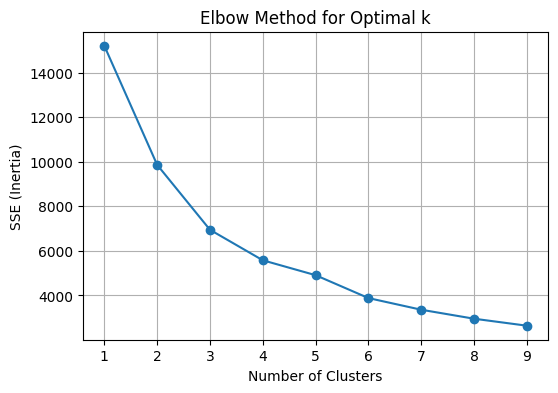

In [ ]:
# elbow method for identifying 'k'
sse = []
for k in range(1, 10):
    km = KMeans(n_clusters = k, random_state = 42)
    km.fit(pca_df[["PC1", "PC2"]])
    sse.append(km.inertia_)

plt.figure(figsize = (6, 4))
plt.plot(range(1, 10), sse, marker = 'o')
plt.xlabel('Number of Clusters')
plt.ylabel('SSE (Inertia)')
plt.title('Elbow Method for Optimal k')
plt.grid(True)
plt.show()


In [ ]:
kmeans = KMeans(n_clusters = 3, random_state = 42)
pca_df['Cluster'] = kmeans.fit_predict(pca_df)

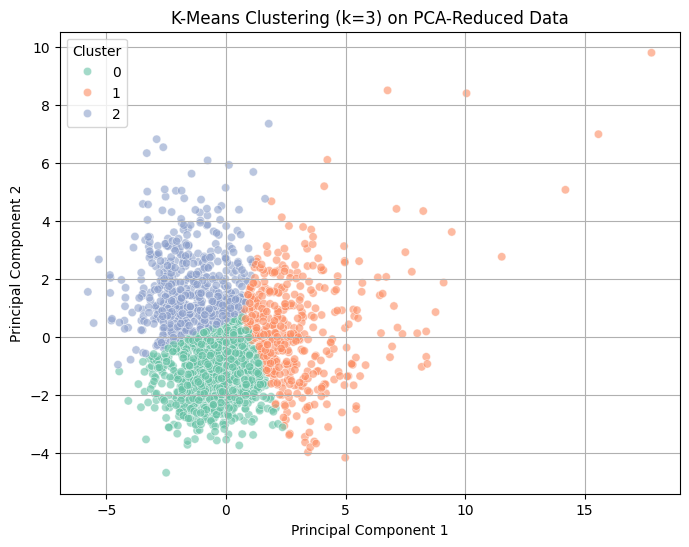

In [ ]:
# Plot
plt.figure(figsize = (8, 6))
sns.scatterplot(
    x = 'PC1', y = 'PC2',
    data = pca_df,
    hue = 'Cluster',
    palette = 'Set2',
    alpha = 0.6
)
plt.title('K-Means Clustering (k=3) on PCA-Reduced Data')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title = 'Cluster')
plt.grid(True)
plt.show()

In [ ]:
from sklearn.metrics import silhouette_score

score = silhouette_score(pca_df[['PC1', 'PC2']], pca_df['Cluster'])
print(f"Silhouette Score: {score:.3f}")


Silhouette Score: 0.349


The Silhouette Score measures how similar a point is to its own cluster vs. other clusters.

Ranges from -1 to 1.

Closer to 1 = well-clustered.

Near 0 = overlapping clusters.

Negative = misclassified points.

Our score is below 0.5, which means the structure isn't super distinct and there's likely some overlap or ambiguous boundaries between the clusters.

# County-Level Choropleth Cluster Map

In [ ]:
kmeans = KMeans(n_clusters = 3, random_state = 42)
labels = kmeans.fit_predict(pca_df)
df = pd.DataFrame(X_train_scaled, columns = feature_names)
df['Cluster'] = labels
cluster_means = df.groupby('Cluster').mean()
#print(cluster_means, file = open("cluster_means.tsv", "w"))
print(cluster_means)

         Pct_renter_occupied  Distance_to_medsurge_icu  \
Cluster                                                  
0                  -0.504294                  0.230642   
1                   0.116475                  0.093216   
2                   0.832674                 -0.579996   

         Pct_renter_cost_50pct_plus  Total_population_poverty  \
Cluster                                                         
0                         -0.498335                 -0.232231   
1                          0.429259                 -0.215257   
2                          0.395695                  0.749049   

         Pct_owner_cost_30plus  Population_density  Median_hh_income  \
Cluster                                                                
0                    -0.268021           -0.319527          0.059349   
1                    -0.082272           -0.302040         -0.790842   
2                     0.638574            1.038595          0.958620   

         Pct_hh_65_alo

In [ ]:
# extract FIPS from the cleaned dataset using the same indices used in training
fips_train = df_cleaned.loc[X_train_scaled.index, ['CountyFIPS']].copy()

fips_train['Cluster'] = labels
print(fips_train.head())

      CountyFIPS  Cluster
1305       26139        0
400        13017        1
2692       48329        2
143         5055        1
1436       28061        1


In [ ]:
fips_train["CountyFIPS"] = fips_train["CountyFIPS"].astype(str).str.zfill(5)
fips_train["Cluster"] = fips_train["Cluster"].astype(str)


In [ ]:
import plotly.express as px
import plotly.io as pio
pio.renderers.default = 'colab'


fig = px.choropleth(
    fips_train,
    geojson = "https://raw.githubusercontent.com/plotly/datasets/master/geojson-counties-fips.json",
    locations = "CountyFIPS",
    color = "Cluster",  # categorical
    scope = "usa",
    labels = {"Cluster": "Cluster Group"},
    color_discrete_map = {
    "0": "#66c2a5",
    "1": "#fc8d62",
    "2": "#8da0cb"
}
)

fig.update_geos(fitbounds = "locations", visible = False)

fig.update_layout(
    title = {
        'text': "County-Level Clusters (K-Means)",
        'y': 0.95,
        'x': 0.5,
        'xanchor': 'center',
        'yanchor': 'top',
        'font': {'size': 24}
    }
)

#pio.renderers.default = 'browser'
#fig.show()
fig.show(renderer='colab')



# Supervised Predictive Modeling Pipeline: Model Training, Tuning, and Evaluation

In [ ]:
"""
The following codes demonstrates a comprehensive workflow for supervised predictive
modeling, focusing on regression tasks. to provide a structured approach to
building, tuning, and thoroughly evaluating regression models, incorporating
techniques for understanding model behavior and identifying potential areas
for improvement.
It covers several key stages:

1. Core Utility Function:Defines `evaluate_and_plot`, a versatile function
   for training regression models, evaluating their performance using common
   metrics (RMSE, R², MAE), and generating insightful diagnostic plots
   (residuals vs. predicted, residual distribution, predicted vs. actual).
   This function also includes optional handling for Box-Cox transformation
   to address potential issues with the target variable's distribution.

2. Hyperparameter Tuning with GridSearchCV: Implements hyperparameter
   optimization for an XGBoost Regressor using GridSearchCV. This involves
   defining a parameter grid, setting up cross-validation using KFold,
   and searching for the best combination of hyperparameters based on
   the negative mean squared error. The best performing model and its
   parameters are then identified and evaluated using the
   `evaluate_and_plot` function.

3. Feature Importance Analysis: For the tuned XGBoost model, this section
   visualizes the importance of different features in making predictions.
   This provides insights into which features have the most influence on the
   model's output.

4. Diagnostic Plot and Residual Analysis by Region: This part delves deeper
   into the model's performance by analyzing residuals with respect to a
   categorical feature ('Region' in this case). It calculates summary statistics
   of the residuals for each region and generates a boxplot to visualize the
   distribution of residuals across different regions. This can help identify
   potential biases or areas where the model performs differently.

"""

"\nThe following codes demonstrates a comprehensive workflow for supervised predictive\nmodeling, focusing on regression tasks. to provide a structured approach to\nbuilding, tuning, and thoroughly evaluating regression models, incorporating\ntechniques for understanding model behavior and identifying potential areas\nfor improvement.\nIt covers several key stages:\n\n1. Core Utility Function:Defines `evaluate_and_plot`, a versatile function\n   for training regression models, evaluating their performance using common\n   metrics (RMSE, R², MAE), and generating insightful diagnostic plots\n   (residuals vs. predicted, residual distribution, predicted vs. actual).\n   This function also includes optional handling for Box-Cox transformation\n   to address potential issues with the target variable's distribution.\n\n2. Hyperparameter Tuning with GridSearchCV: Implements hyperparameter\n   optimization for an XGBoost Regressor using GridSearchCV. This involves\n   defining a parameter grid

# Supervised/Predictive Model

## Hyperparameter Tuning & Other Model Tuning

In [ ]:
from sklearn.model_selection import train_test_split, KFold
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import xgboost as xgb
from scipy.stats import boxcox
from scipy.special import inv_boxcox

def evaluate_and_plot(model, X_train, X_test, y_train, y_test, model_name="Model", lambda_bc=None):
    """
    Evaluates a regression model, prints performance metrics, and generates diagnostic plots.
    Optionally handles Box-Cox transformation for predictions and true values.

    Args:
        model: Trained regression model.
        X_train: Training features.
        X_test: Testing features.
        y_train: Training target variable (original scale or Box-Cox).
        y_test: Testing target variable (original scale or Box-Cox).
        model_name: Label for printed metrics and plots.
        lambda_bc: Lambda value used for Box-Cox transformation. If provided,
                   will inverse-transform both predictions and targets.

    Returns:
        None. Prints metrics and shows residual and prediction plots.
    """
    # Predict
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    # Optional: Inverse Box-Cox transform to original scale
    if lambda_bc is not None:
        epsilon = 1e-6  # Small positive value for numerical stability

        # Clip both predictions AND true values for numerical stability
        y_train_pred = np.clip(y_train_pred, epsilon, None)
        y_test_pred = np.clip(y_test_pred, epsilon, None)
        y_train = np.clip(y_train, epsilon, None)
        y_test = np.clip(y_test, epsilon, None)

        # Debug: show predictions before inverse
        print("\nBefore Inverse Box-Cox")
        print("Predicted (Box-Cox):", y_test_pred[:5])
        print("Actual (Box-Cox):   ", y_test[:5])

        # Inverse Box-Cox (predictions and targets)
        y_train_pred = inv_boxcox(y_train_pred, lambda_bc)
        y_test_pred = inv_boxcox(y_test_pred, lambda_bc)
        y_train = inv_boxcox(y_train, lambda_bc)
        y_test = inv_boxcox(y_test, lambda_bc)

        # Debug: show predictions after inverse
        print("\nAfter Inverse Box-Cox")
        print("Predicted (Original):", y_test_pred[:5])
        print("Actual (Original):   ", y_test[:5])


    # Metrics
    train_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred))
    test_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))
    train_r2 = r2_score(y_train, y_train_pred)
    test_r2 = r2_score(y_test, y_test_pred)
    train_mae = mean_absolute_error(y_train, y_train_pred)
    test_mae = mean_absolute_error(y_test, y_test_pred)

    print(f"\n{model_name} Performance:")
    print(f"Train RMSE: {train_rmse:.4f} | R²: {train_r2:.4f} | MAE: {train_mae:.4f}")
    print(f"Test  RMSE: {test_rmse:.4f} | R²: {test_r2:.4f} | MAE: {test_mae:.4f}")

    # Residuals
    residuals = y_test - y_test_pred

    # Diagnostic plots
    plt.figure(figsize=(8, 5))
    sns.scatterplot(x=y_test_pred, y=residuals)
    plt.axhline(0, linestyle='--', color='red')
    plt.title(f'{model_name} Residuals vs Predicted')
    plt.xlabel('Predicted')
    plt.ylabel('Residuals')
    plt.grid(True)
    plt.tight_layout()
    plt.show()

    plt.figure(figsize=(8, 5))
    sns.histplot(residuals, kde=True, bins=30)
    plt.title(f'{model_name} Residual Distribution')
    plt.xlabel('Residuals')
    plt.ylabel('Count')
    plt.grid(True)
    plt.tight_layout()
    plt.show()

    plt.figure(figsize=(8, 5))
    sns.scatterplot(x=y_test, y=y_test_pred)
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
    plt.title(f'{model_name} Predicted vs Actual')
    plt.xlabel('Actual')
    plt.ylabel('Predicted')
    plt.grid(True)
    plt.tight_layout()
    plt.show()



# XGBoost Regressor (with GridSearchCV - No PCA)

Fitting 5 folds for each of 8 candidates, totalling 40 fits
XGBoost Best Params: {'learning_rate': 0.05, 'max_depth': 3, 'n_estimators': 100}

XGBoost Regression Performance:
Train RMSE: 0.1163 | R²: 0.4956 | MAE: 0.0917
Test  RMSE: 0.1378 | R²: 0.3617 | MAE: 0.1057


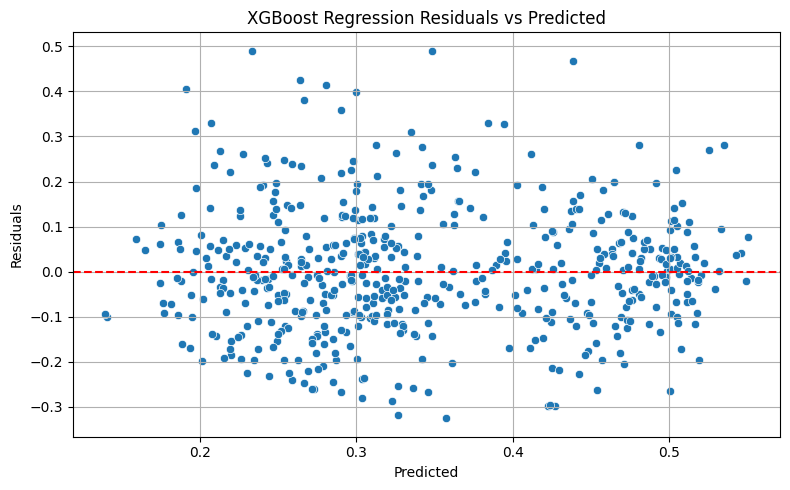

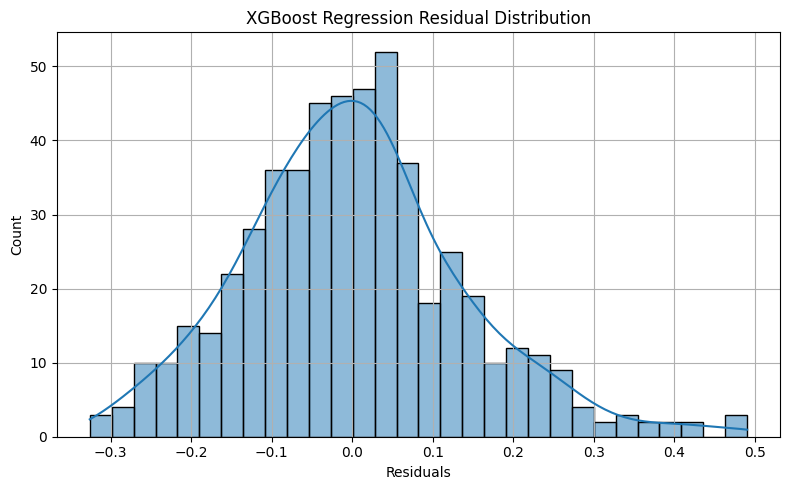

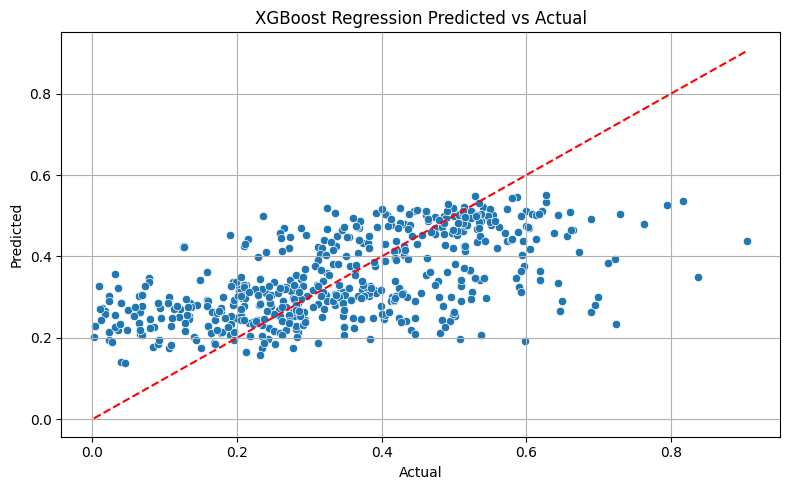

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.05, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=3, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=100, n_jobs=None,
             num_parallel_tree=None, random_state=42, ...)

In [ ]:
"""
Performs hyperparameter tuning for XGBoost Regression using GridSearchCV
and evaluates the best model.

The XGBoost Regressor is tuned over the following hyperparameters:
- 'n_estimators': [100, 200] (number of trees in the forest)
- 'max_depth': [3, 5] (maximum depth of the trees)
- 'learning_rate': [0.05, 0.1] (learning rate of the boosting)

GridSearchCV uses the specified cross-validation strategy (`cv_strategy`) and
neg_mean_squared_error as the scoring metric to find the optimal combination
of hyperparameters. A fixed `random_state` is used for reproducibility.

After fitting the GridSearchCV object, the best estimator is retrieved,
its best parameters are printed, and the `evaluate_and_plot` function is
called to assess its performance on the scaled training and testing data,
generating relevant evaluation metrics and diagnostic plots.
"""
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold

# Define cross-validation strategy
cv_strategy = KFold(n_splits=5, shuffle=True, random_state=42)


# XGBoost Tuning
xgb_params = {
    'learning_rate': [0.05, 0.1],
    'n_estimators': [100, 200],
    'max_depth': [3, 5]
}

xgb_grid = GridSearchCV(
    xgb.XGBRegressor(objective='reg:squarederror', random_state=42),
    xgb_params, cv=cv_strategy, scoring='neg_mean_squared_error', n_jobs=-1, verbose=1
)
xgb_grid.fit(X_train_scaled, y_train)

# XGBoost Evaluation
xgb_best = xgb_grid.best_estimator_
print("XGBoost Best Params:", xgb_grid.best_params_)
evaluate_and_plot(xgb_best, X_train_scaled, X_test_scaled, y_train, y_test, "XGBoost Regression")

xgb_best = xgb_grid.best_estimator_
xgb_best


XGBoost Feature Importance

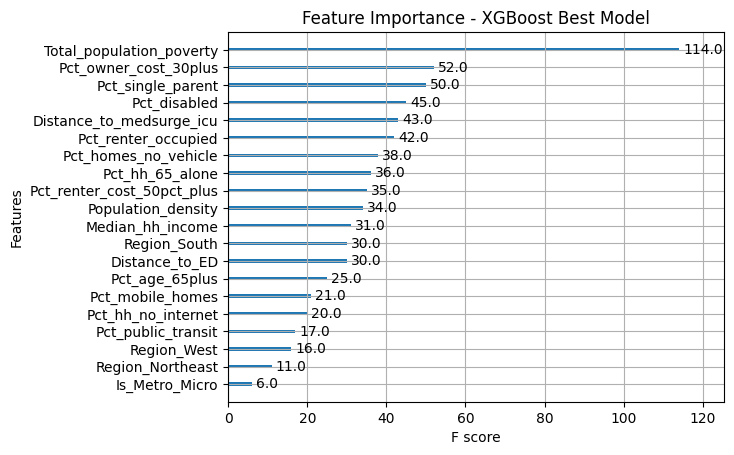

In [ ]:
# Plot Feature Importance
from xgboost import plot_importance
import matplotlib.pyplot as plt

plot_importance(xgb_best)
plt.title('Feature Importance - XGBoost Best Model')
plt.show()

# Diagnostic Plot and Residual Analysis by Region


               mean       std  count
Region                              
West      -0.009862  0.151498     85
Midwest   -0.009393  0.127180    172
South      0.009455  0.142630    212
Northeast  0.023838  0.128410     58


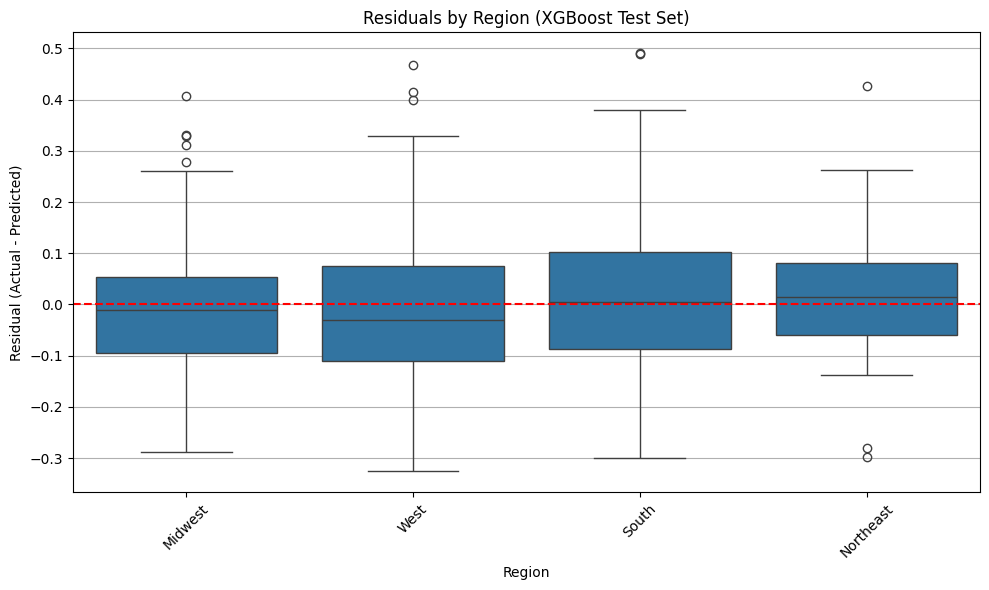

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Recalculate predictions for the test set using the final XGBoost model
y_test_pred = xgb_best.predict(X_test_scaled)

# Calculate residuals
residuals = y_test - y_test_pred

# Retrieve Region info from original df_modeling using test set index
region_test = df_modeling.loc[y_test.index, "Region"]

# Combine into a DataFrame for analysis
residuals_df = pd.DataFrame({
    "Region": region_test,
    "Residual": residuals
})

# Summary table of residuals by Region
region_summary = residuals_df.groupby("Region")["Residual"].agg(["mean", "std", "count"]).sort_values("mean")
print(region_summary)

# Plot residuals by Region (Boxplot)
plt.figure(figsize=(10, 6))
sns.boxplot(x="Region", y="Residual", data=residuals_df)
plt.axhline(0, color='red', linestyle='--')
plt.title("Residuals by Region (XGBoost Test Set)")
plt.ylabel("Residual (Actual - Predicted)")
plt.xlabel("Region")
plt.xticks(rotation=45)
plt.grid(True, axis='y')
plt.tight_layout()
plt.show()
